# Correlation Plots

Data Frame 1

Created all the NA to zeros to have a numerical study of the data

In [1]:
library(readxl)
library(RColorBrewer)
library(corrplot)
#install.packages("psych")
#install.packages("PerformanceAnalytics")
library(PerformanceAnalytics)
library(psych)
library(mvtnorm) # col.norm
library(tilting) # col.norm
#install.packages('ggplot2')
library(ggplot2)
library("np") #npreg: you may need to install it
#install.packages(c("FactoMineR", "factoextra"))
library("FactoMineR")
library(tidyverse) #data Manipulation
library(cluster) #Clustering algorithms
library(factoextra)#Clustering Algorithms & Visualization
library(gridExtra)
#install.packages("dendextend")
#install.packages("ggplot2")
#install.packages("rlang")
library(dendextend) # For fancy deprograms
library(rlang) # clustering cutting

corrplot 0.84 loaded

Warning message:
"package 'PerformanceAnalytics' was built under R version 4.0.3"
Loading required package: xts

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



Attaching package: 'PerformanceAnalytics'


The following object is masked from 'package:graphics':

    legend


Warning message:
"package 'psych' was built under R version 4.0.3"
Warning message:
"package 'ggplot2' was built under R version 4.0.3"

Attaching package: 'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha


Nonparametric Kernel Methods for Mixed Datatypes (version 0.60-10)
[vignette("np_faq",package="np") provides answers to frequently asked questions]
[vignette("np",package="np") an overview]
[vignette("entropy_np",package="np") an overview of entropy-based methods]

Warning message:
"package 'FactoMineR' was built under R version 4.0.3"
Warning message:
"package 

In [2]:
dfsimple <- read_excel("../../results/dfsimple.xlsx",sheet=1)
df.wb <- read_excel("../../results/df-wb.xlsx",sheet=1)
head(dfsimple)
head(df.wb)
max(dfsimple$Year)


Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc,clusters
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,20.1,18.5,4.7,...,45.3,45.2,8.2,30.0,5.8,35.2,11.8,0.0,0.1,1
Albania,2018,DHS,98.4,48.8,5.2,2.4,1.4,4.1,2.5,...,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1,2
Angola,2016,DHS,66.9,4.3,9.7,10.3,1.9,9.1,3.3,...,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3,1
Armenia,2016,DHS,99.9,88.3,8.0,0.5,0.2,0.2,1.0,...,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1,2
Azerbaijan,2006,DHS,90.6,34.0,19.7,3.5,9.3,6.2,7.5,...,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,0.0,2
Bangladesh,2014,DHS,97.8,4.3,3.3,2.7,86.4,0.2,0.0,...,75.5,22.7,1.6,25.1,0.0,6.4,0.8,0.0,0.3,2


Country,Country Code,Year,Time Code,cgdp,tpop,upop,popd,land,lita,lity,mori
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,2018,YR2018,18353881130,37172386,25.495,56.93776,652860,43.01972,0.75933,62.5
Albania,ALB,2018,YR2018,15147020535,2866376,60.319,104.61226,27400,98.14115,1.00582,9.5
Algeria,DZA,2018,YR2018,175405660377,42228429,72.629,17.73008,2381740,81.40784,0.99650,23.8
American Samoa,ASM,2018,YR2018,636000000,55465,87.153,277.32500,200,0.00000,0.00000,0.0
Andorra,AND,2018,YR2018,3218316013,77006,88.062,163.84255,470,0.00000,0.00000,3.1
Angola,AGO,2018,YR2018,101353230785,30809762,65.514,24.71305,1246700,0.00000,0.00000,77.7


[1] 2019

In [3]:
dfsimple[is.na(dfsimple)] <- 0 # Convert all your NA to 0 to keep numeric values
head(dfsimple)

Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc,clusters
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,20.1,18.5,4.7,...,45.3,45.2,8.2,30.0,5.8,35.2,11.8,0.0,0.1,1
Albania,2018,DHS,98.4,48.8,5.2,2.4,1.4,4.1,2.5,...,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1,2
Angola,2016,DHS,66.9,4.3,9.7,10.3,1.9,9.1,3.3,...,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3,1
Armenia,2016,DHS,99.9,88.3,8.0,0.5,0.2,0.2,1.0,...,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1,2
Azerbaijan,2006,DHS,90.6,34.0,19.7,3.5,9.3,6.2,7.5,...,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,0.0,2
Bangladesh,2014,DHS,97.8,4.3,3.3,2.7,86.4,0.2,0.0,...,75.5,22.7,1.6,25.1,0.0,6.4,0.8,0.0,0.3,2


imws,phom,pipy,ptap,bore,pwel,pspr,rain,truc,ctan,...,liws,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
71.2,2.3,4.8,14.2,20.1,18.5,4.7,0.4,1.5,4.4,...,5.0,45.3,45.2,8.2,30.0,5.8,35.2,11.8,0.0,0.1
98.4,48.8,5.2,2.4,1.4,4.1,2.5,0.0,14.1,0.2,...,0.9,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1
66.9,4.3,9.7,10.3,1.9,9.1,3.3,1.7,9.7,4.3,...,7.5,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3
99.9,88.3,8.0,0.5,0.2,0.2,1.0,0.0,1.5,0.0,...,0.1,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1
90.6,34.0,19.7,3.5,9.3,6.2,7.5,0.0,9.5,0.7,...,3.4,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,0.0
97.8,4.3,3.3,2.7,86.4,0.2,0.0,0.4,0.0,0.1,...,1.3,75.5,22.7,1.6,25.1,0.0,6.4,0.8,0.0,0.3
71.7,5.1,4.2,13.0,28.9,4.4,0.3,0.4,0.2,0.3,...,7.3,37.4,49.8,12.1,19.4,3.2,56.1,4.2,0.2,0.3
87.3,24.6,54.1,5.3,0.0,1.7,0.0,0.0,1.7,0.0,...,0.0,88.0,11.2,0.7,36.6,0.0,6.5,15.6,0.0,0.0
76.0,69.2,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.2,0.0,0.0


,imws,phom,pipy,ptap,bore,pwel,pspr,rain,truc,ctan,...,liws,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc
imws,1.00,0.41,0.17,-0.04,0.13,-0.03,-0.02,0.08,0.04,0.04,...,-0.14,0.55,-0.33,-0.33,0.07,-0.01,0.08,0.43,-0.04,-0.01
phom,0.41,1.00,-0.04,-0.34,-0.38,-0.22,-0.22,-0.11,0.13,-0.16,...,-0.42,0.45,-0.61,-0.46,-0.17,-0.16,-0.22,0.64,-0.14,-0.45
pipy,0.17,-0.04,1.00,0.29,-0.24,-0.19,-0.08,-0.06,-0.05,-0.03,...,-0.09,0.24,-0.10,-0.15,0.12,0.11,-0.22,0.15,0.05,-0.07
ptap,-0.04,-0.34,0.29,1.00,-0.08,0.04,0.24,-0.22,-0.09,-0.16,...,0.49,-0.31,0.56,0.46,-0.14,0.14,-0.22,-0.28,-0.25,0.20
bore,0.13,-0.38,-0.24,-0.08,1.00,0.11,-0.14,-0.11,-0.19,-0.04,...,0.19,-0.14,0.34,0.10,0.26,0.23,0.32,-0.34,-0.12,0.43
pwel,-0.03,-0.22,-0.19,0.04,0.11,1.00,-0.03,-0.14,0.00,0.18,...,0.18,-0.40,0.20,0.20,0.11,0.16,0.07,-0.18,-0.11,0.08
pspr,-0.02,-0.22,-0.08,0.24,-0.14,-0.03,1.00,-0.07,-0.06,-0.01,...,0.41,-0.22,0.28,0.36,-0.13,-0.15,-0.13,-0.20,-0.09,0.20
rain,0.08,-0.11,-0.06,-0.22,-0.11,-0.14,-0.07,1.00,-0.07,0.01,...,-0.18,0.09,-0.28,-0.17,0.32,-0.05,0.36,-0.06,0.75,-0.12
truc,0.04,0.13,-0.05,-0.09,-0.19,0.00,-0.06,-0.07,1.00,0.09,...,0.05,0.22,-0.20,0.08,-0.17,-0.06,-0.15,0.28,-0.07,-0.24
ctan,0.04,-0.16,-0.03,-0.16,-0.04,0.18,-0.01,0.01,0.09,1.00,...,-0.08,0.06,-0.02,-0.06,-0.12,0.09,0.15,-0.01,0.03,0.10


,imws,phom,pipy,ptap,bore,pwel,pspr,rain,truc,ctan,...,liws,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc
imws,1.00,0.41,0.17,-0.04,0.13,-0.03,-0.02,0.08,0.04,0.04,...,-0.14,0.55,-0.33,-0.33,0.07,-0.01,0.08,0.43,-0.04,-0.01
phom,0.41,1.00,-0.04,-0.34,-0.38,-0.22,-0.22,-0.11,0.13,-0.16,...,-0.42,0.45,-0.61,-0.46,-0.17,-0.16,-0.22,0.64,-0.14,-0.45
pipy,0.17,-0.04,1.00,0.29,-0.24,-0.19,-0.08,-0.06,-0.05,-0.03,...,-0.09,0.24,-0.10,-0.15,0.12,0.11,-0.22,0.15,0.05,-0.07
ptap,-0.04,-0.34,0.29,1.00,-0.08,0.04,0.24,-0.22,-0.09,-0.16,...,0.49,-0.31,0.56,0.46,-0.14,0.14,-0.22,-0.28,-0.25,0.20
bore,0.13,-0.38,-0.24,-0.08,1.00,0.11,-0.14,-0.11,-0.19,-0.04,...,0.19,-0.14,0.34,0.10,0.26,0.23,0.32,-0.34,-0.12,0.43
pwel,-0.03,-0.22,-0.19,0.04,0.11,1.00,-0.03,-0.14,0.00,0.18,...,0.18,-0.40,0.20,0.20,0.11,0.16,0.07,-0.18,-0.11,0.08


Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc,clusters
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,20.1,18.5,4.7,...,45.3,45.2,8.2,30.0,5.8,35.2,11.8,0.0,0.1,1
Albania,2018,DHS,98.4,48.8,5.2,2.4,1.4,4.1,2.5,...,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1,2
Angola,2016,DHS,66.9,4.3,9.7,10.3,1.9,9.1,3.3,...,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3,1
Armenia,2016,DHS,99.9,88.3,8.0,0.5,0.2,0.2,1.0,...,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1,2
Azerbaijan,2006,DHS,90.6,34.0,19.7,3.5,9.3,6.2,7.5,...,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,0.0,2
Bangladesh,2014,DHS,97.8,4.3,3.3,2.7,86.4,0.2,0.0,...,75.5,22.7,1.6,25.1,0.0,6.4,0.8,0.0,0.3,2
Benin,2018,DHS,71.7,5.1,4.2,13.0,28.9,4.4,0.3,...,37.4,49.8,12.1,19.4,3.2,56.1,4.2,0.2,0.3,1
Bolivia,2008,DHS,87.3,24.6,54.1,5.3,0.0,1.7,0.0,...,88.0,11.2,0.7,36.6,0.0,6.5,15.6,0.0,0.0,2
Brazil,1996,DHS,76.0,69.2,3.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,30.2,0.0,0.0,3


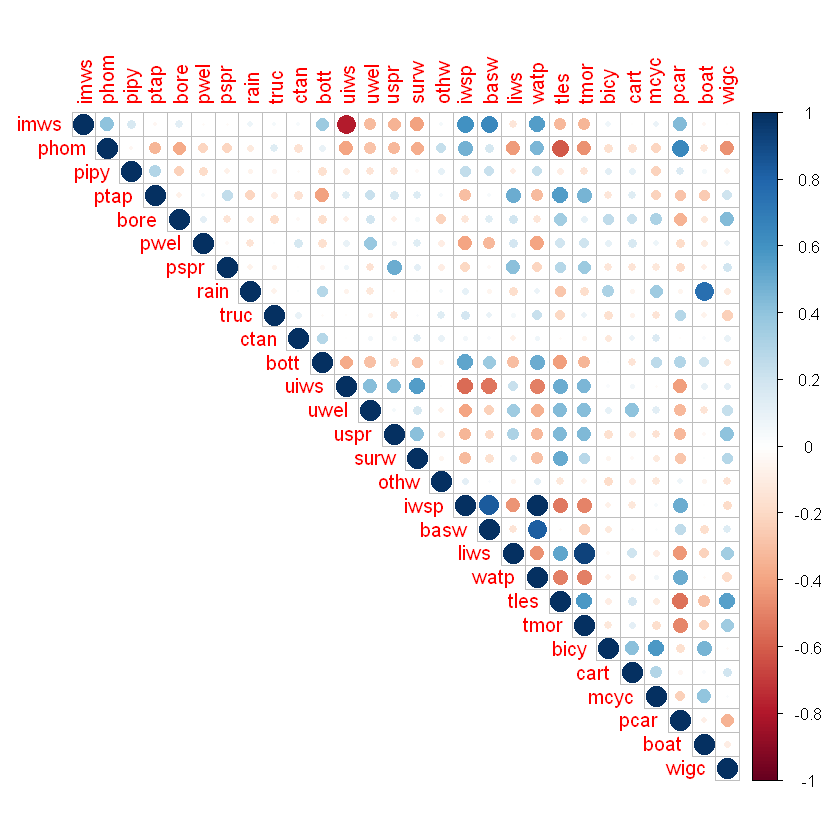

In [4]:
my_data <- dfsimple[, c(4:31)]
head(my_data, 31)
res <- cor(my_data)
round(res, 2)
M<-cor(my_data)
head(round(M,2))
corrplot(M, type="upper", tl.cex = 1)

as.data.frame(dfsimple)

# Advanced Correlation Graphs

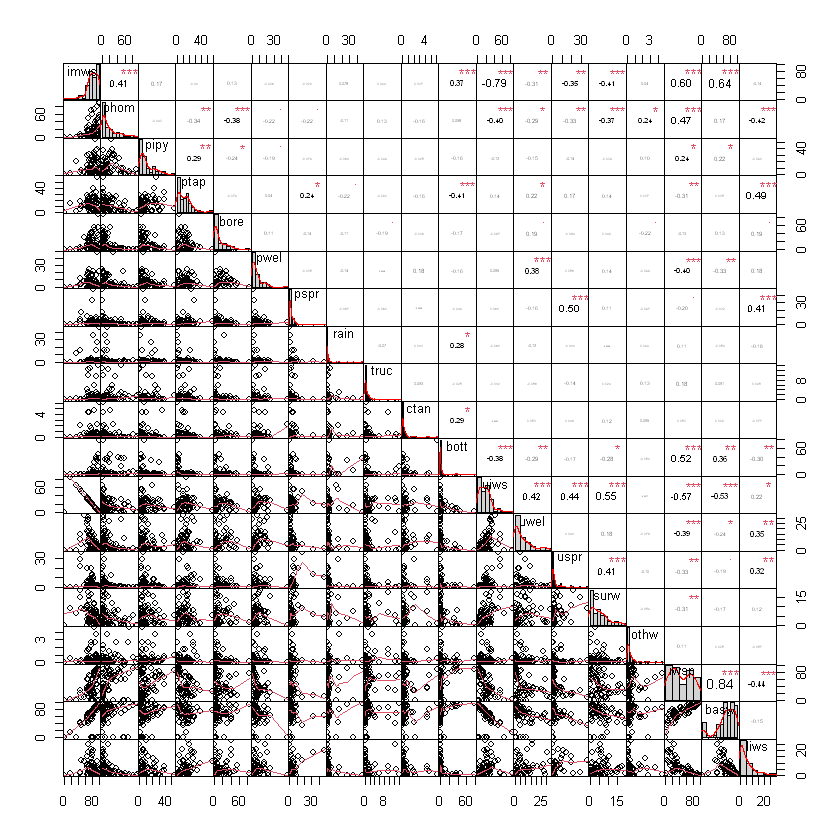

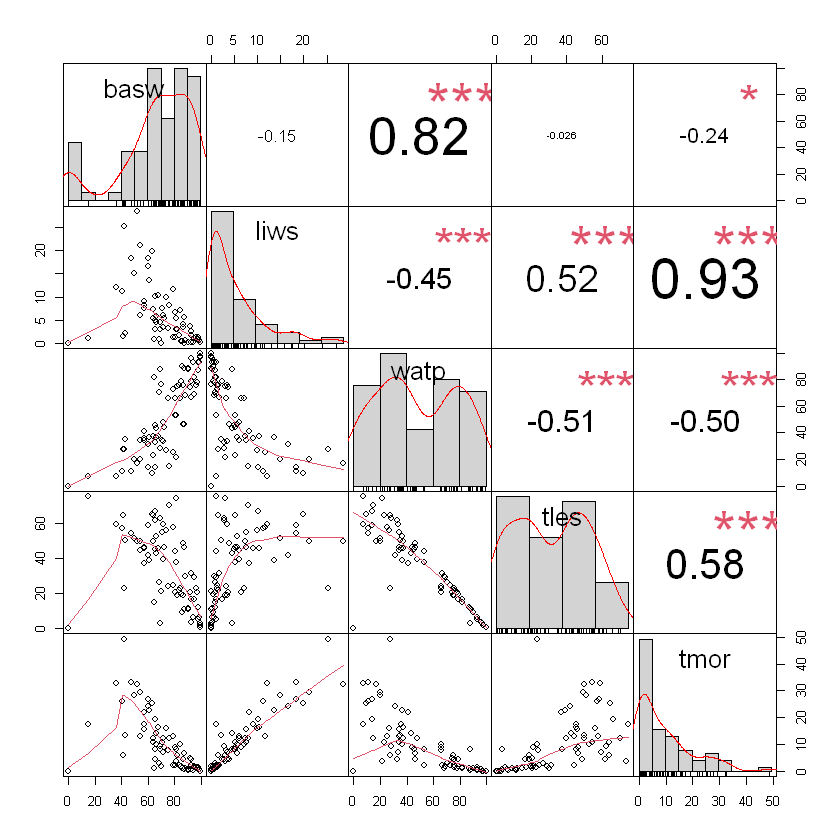

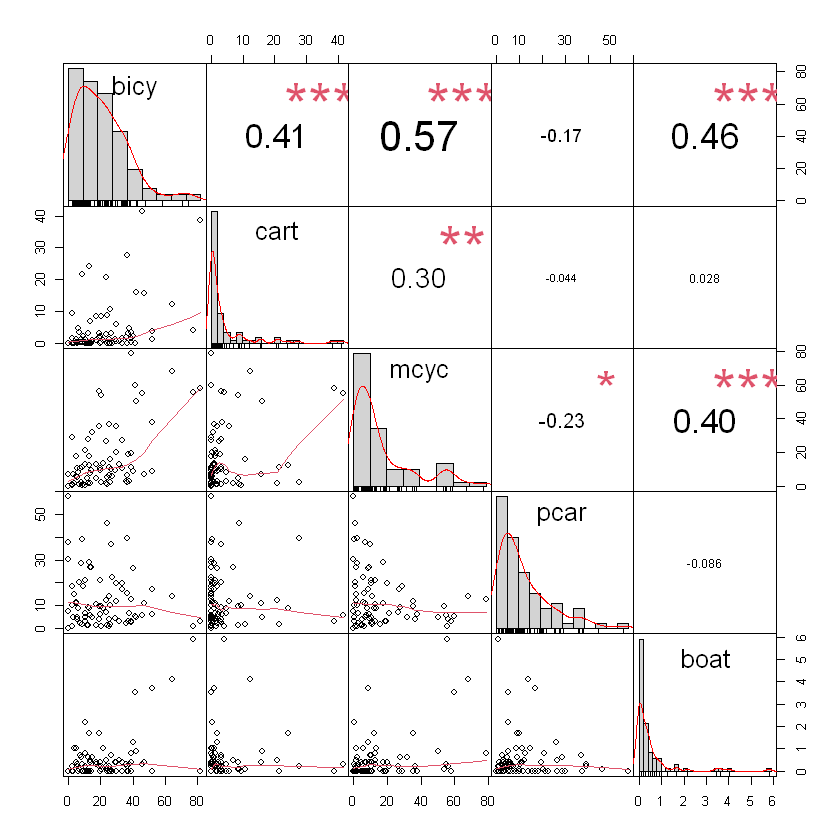

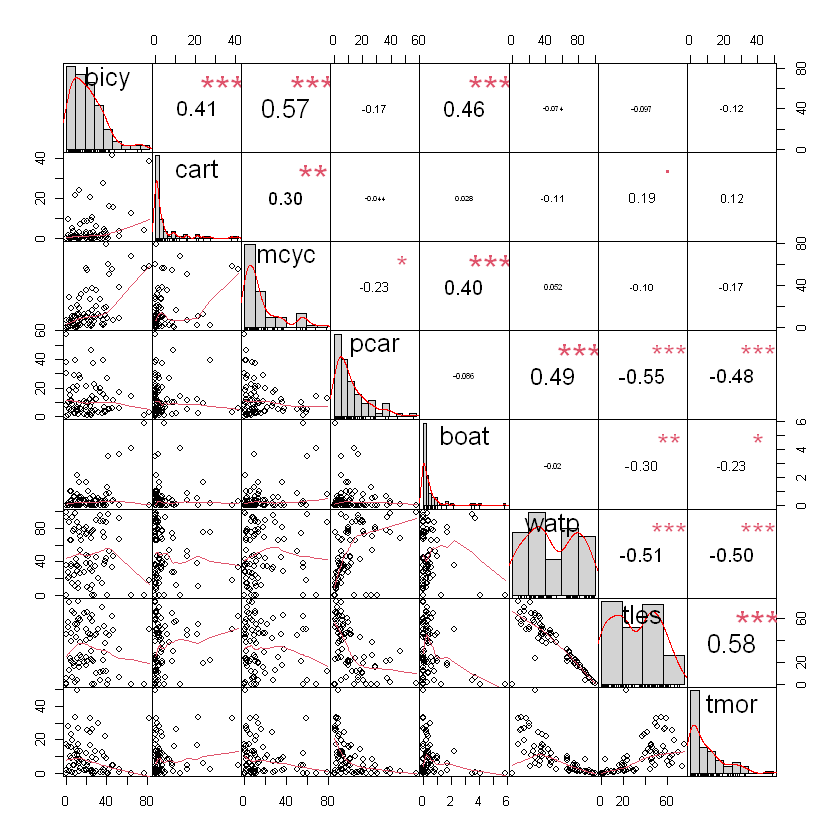

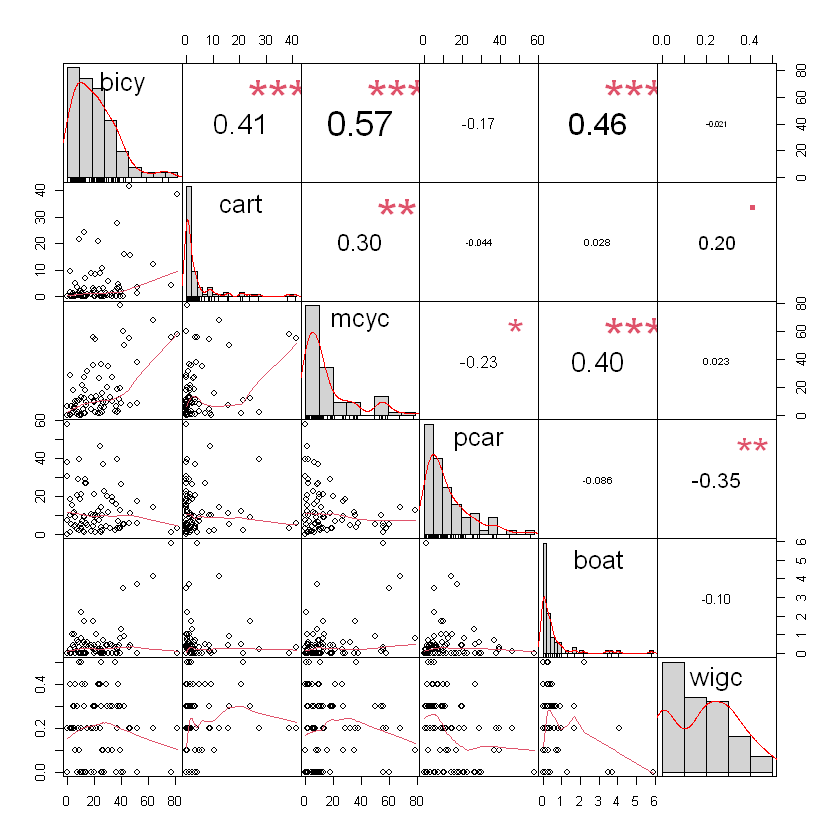

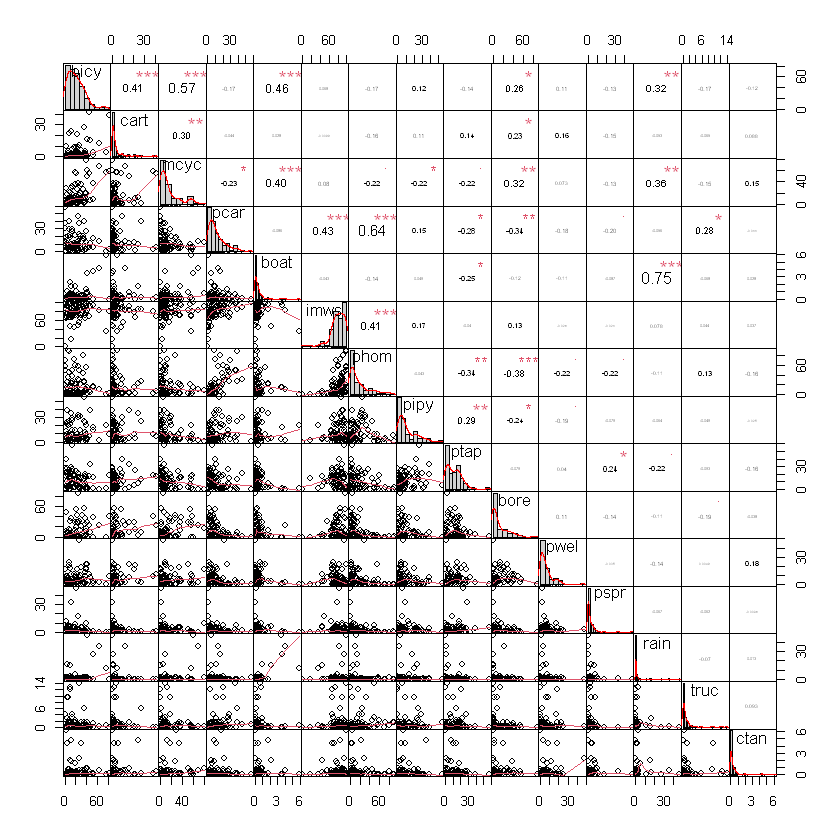

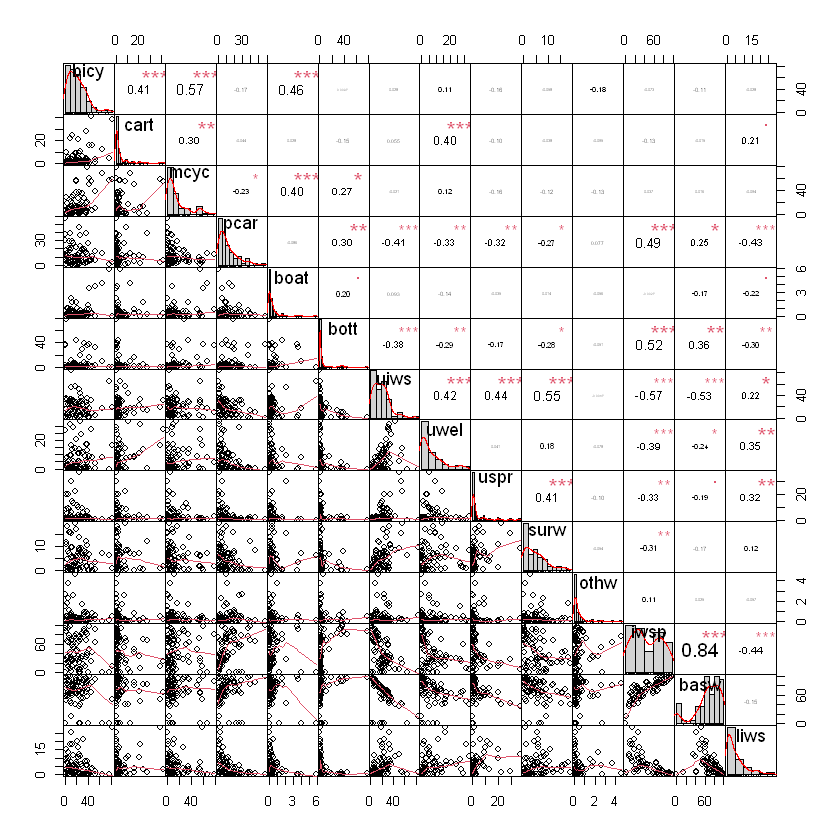

In [5]:
#sample for water sources
my_data_acc <- dfsimple[, c(4:22)]
chart.Correlation(my_data_acc, histogram=TRUE, pch=19 , tl.cex = .7 )
#sample for location/premise
my_data_loc <- dfsimple[, c(21:25)]
chart.Correlation(my_data_loc, histogram=TRUE, pch=19 , tl.cex = .5 )
#sample for transportation
my_data_move <- dfsimple[, c(26:30)]
chart.Correlation(my_data_move, histogram=TRUE, pch=19 , tl.cex = .5 )
#Comparison with Transportation and Time it gets to the source of water
my_data_time <- dfsimple[, c(26:30,23:25)]
chart.Correlation(my_data_time, histogram=TRUE, pch=19 , tl.cex = .5 )
#sample for transportation compared with wealth
my_data_money <- dfsimple[, c(26:31)]
chart.Correlation(my_data_money, histogram=TRUE, pch=19 , tl.cex = .5 )
#sample for transportation, water retrieving part 1 comparison
my_data_water1 <- dfsimple[, c(26:30, 4:13)]
chart.Correlation(my_data_water1, histogram=TRUE, pch=19 , tl.cex = .5 )
#sample for transportation, water retrieving part 2 comparison
my_data_water2 <- dfsimple[, c(26:30, 14:22)]
chart.Correlation(my_data_water2, histogram=TRUE, pch=19 , tl.cex = .5 )

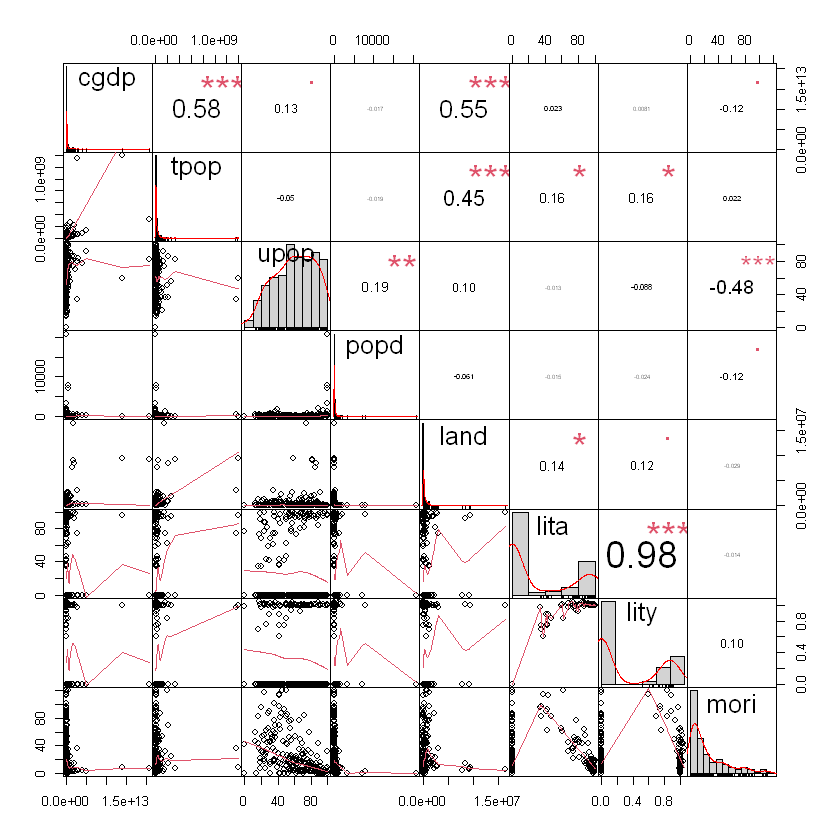

In [6]:
#Exploratory Data from World Bank 
chart.Correlation(df.wb[, 5:12], histogram=TRUE, pch=19 , tl.cex = .7 )

# Principal Component Analysis

[1] 6290.832

[1] 4.912542e-01 1.411318e-01 1.044474e-01 6.040605e-02 3.814140e-02
 [6] 3.654032e-02 2.753036e-02 1.610007e-02 1.515739e-02 1.449143e-02
[11] 9.559567e-03 9.278562e-03 7.487747e-03 6.827024e-03 5.550879e-03
[16] 3.816912e-03 3.539885e-03 2.929397e-03 1.876686e-03 1.510843e-03
[21] 1.059998e-03 4.761956e-04 4.713675e-04 1.780201e-04 1.306606e-04
[26] 7.748665e-05 2.677815e-05 1.549328e-06

[1] 4.912542e-01 1.411318e-01 1.044474e-01 6.040605e-02 3.814140e-02
 [6] 3.654032e-02 2.753036e-02 1.610007e-02 1.515739e-02 1.449143e-02
[11] 9.559567e-03 9.278562e-03 7.487747e-03 6.827024e-03 5.550879e-03
[16] 3.816912e-03 3.539885e-03 2.929397e-03 1.876686e-03 1.510843e-03
[21] 1.059998e-03 4.761956e-04 4.713675e-04 1.780201e-04 1.306606e-04
[26] 7.748665e-05 2.677815e-05 1.549328e-06

[1] 0.4912542 0.6323860 0.7368334 0.7972395 0.8353809 0.8719212 0.8994515
 [8] 0.9155516 0.9307090 0.9452004 0.9547600 0.9640386 0.9715263 0.9783533
[15] 0.9839042 0.9877211 0.9912610 0.9941904 0.9960671 0.9975779 0.9986379
[22] 0.9991141 0.9995855 0.9997635 0.9998942 0.9999717 0.9999985 1.0000000

imws       phom       pipy       ptap       bore       pwel       pspr 
78.9487179 19.4269231 11.0333333 11.7551282 12.5705128  6.3141026  3.1282051 
      rain       truc       ctan       bott       uiws       uwel       uspr 
 2.5692308  1.4243590  0.5115385  6.3333333 19.7089744  6.8205128  3.6397436 
      surw       othw       iwsp       basw       liws       watp       tles 
 5.1243590  0.4666667 44.9641026 67.0205128  5.2692308 48.1384615 32.5602564 
      tmor       bicy       cart       mcyc       pcar       boat       wigc 
 9.3461538 22.2397436  4.4282051 16.0615385 12.4500000  0.5346154  0.1987179

imws         phom         pipy         ptap         bore         pwel 
332.41447885 525.81004496 130.70848485 112.75029804 294.87067766  62.83733100 
        pspr         rain         truc         ctan         bott         uiws 
 48.17425907  57.26605395   8.57329504   1.28103397 189.83082251 254.46758075 
        uwel         uspr         surw         othw         iwsp         basw 
 69.57100233  45.52684149  23.44316517   0.70173160 911.68596737 752.25697636 
        liws         watp         tles         tmor         bicy         cart 
 40.25748252 954.34057942 501.29437396 108.38277722 303.04788045  68.40075258 
        mcyc         pcar         boat         wigc 
349.21304695 142.69084416   1.01060440   0.02350483

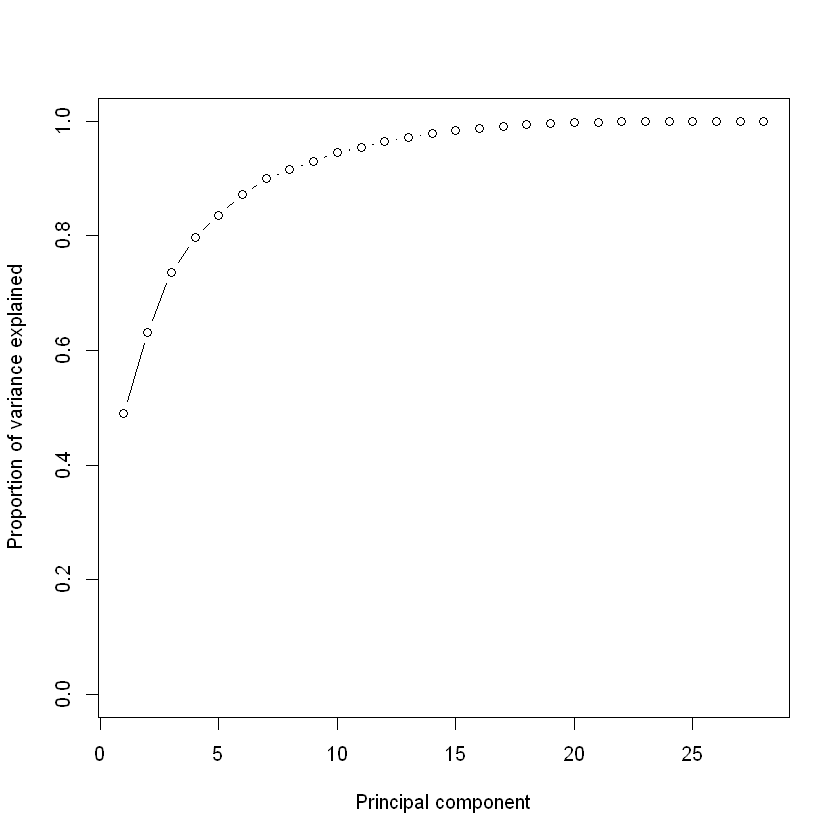

PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9 PC10 PC11 PC12 PC13 PC14 PC15 PC16 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
PC17 PC18 PC19 PC20 PC21 PC22 PC23 PC24 PC25 PC26 PC27 PC28 
   1    1    1    1    1    1    1    1    1    1    1    1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
imws,-0.233065173,0.06882375,-0.32894031,0.024055158,-0.0178992860,0.200616680,-0.13352060,0.16100422,-0.030396634,-0.216473299,...,0.141653193,0.165549285,-0.07111510,-0.250415197,-0.31733205,0.33083033,0.388184932,-0.237688099,-0.0296985369,-4.033934e-02
phom,-0.250892955,0.15047188,0.17968959,0.194289677,0.0385105645,0.132845564,0.04776850,-0.07073912,0.024042986,0.209446452,...,-0.235668718,0.139484466,-0.03878598,-0.015144122,-0.19269092,0.01145062,-0.444089455,0.317422395,-0.0190237770,7.223061e-02
pipy,-0.067793783,0.10683899,-0.05997601,0.033310469,-0.5507260425,-0.275295776,-0.02089145,0.33473233,0.115006212,-0.117706120,...,0.170515650,-0.194604268,-0.05310227,-0.130666934,-0.30979244,-0.01083527,-0.237994492,0.144103689,-0.0025953379,3.250053e-02
ptap,0.175831708,0.22781802,-0.14290651,0.035959673,-0.3847964478,0.004185772,-0.12580275,0.14178103,-0.116574752,-0.021862700,...,-0.017378553,0.047073781,0.11172181,0.001473206,0.39728890,0.24875940,-0.168521062,0.124263516,-0.0258284034,2.120231e-03
bore,0.090156362,-0.14906960,-0.37727653,0.138956664,0.1756265070,0.056653013,0.30357219,-0.20566662,-0.151185965,-0.290163859,...,0.339930137,0.035592565,-0.09621675,-0.180198965,0.21790472,0.23696386,-0.336830949,0.195208169,-0.0219249545,3.120533e-02
pwel,0.133374577,-0.08410256,-0.01041092,0.261583142,0.2788507632,0.074205142,-0.19500818,0.38237080,0.078930526,-0.325007941,...,-0.085191433,-0.050915715,-0.23012186,0.129130725,0.08515620,0.03617116,-0.135829124,0.114564838,0.0242478010,1.450596e-02
pspr,0.117527969,0.16320437,-0.03943695,-0.369316719,-0.0327234132,0.345833870,-0.14459313,0.13525333,0.163046067,0.071847441,...,-0.017893194,-0.091938847,-0.05730489,0.004612914,0.08173771,0.14328306,-0.132593305,0.019689351,-0.0030266610,1.343159e-02
rain,-0.071255852,-0.34643188,0.07391056,-0.302547285,-0.1707087902,0.034167000,-0.19137041,-0.09931427,-0.147040192,-0.125886260,...,0.217006923,-0.126876123,0.19955297,0.385501787,-0.21074687,0.16331853,-0.108913760,0.140632976,0.0683983030,1.452610e-02
truc,-0.064601780,0.13713837,0.11597067,0.077342059,0.1321749150,-0.166034680,-0.44443949,-0.39756118,0.244729125,-0.440894119,...,-0.020442457,0.091367367,0.18141156,-0.102906874,-0.16171807,0.02795443,-0.097036505,0.088189418,-0.0064272350,-2.059531e-02
ctan,-0.011326588,-0.06119453,-0.04313578,-0.109396705,0.3662247824,-0.332638783,-0.31410238,0.45895156,-0.099252931,0.022068051,...,0.050692867,0.207515094,0.01995831,0.179247047,0.09160203,-0.02945580,-0.024901321,0.007161367,0.0025246594,7.530332e-05


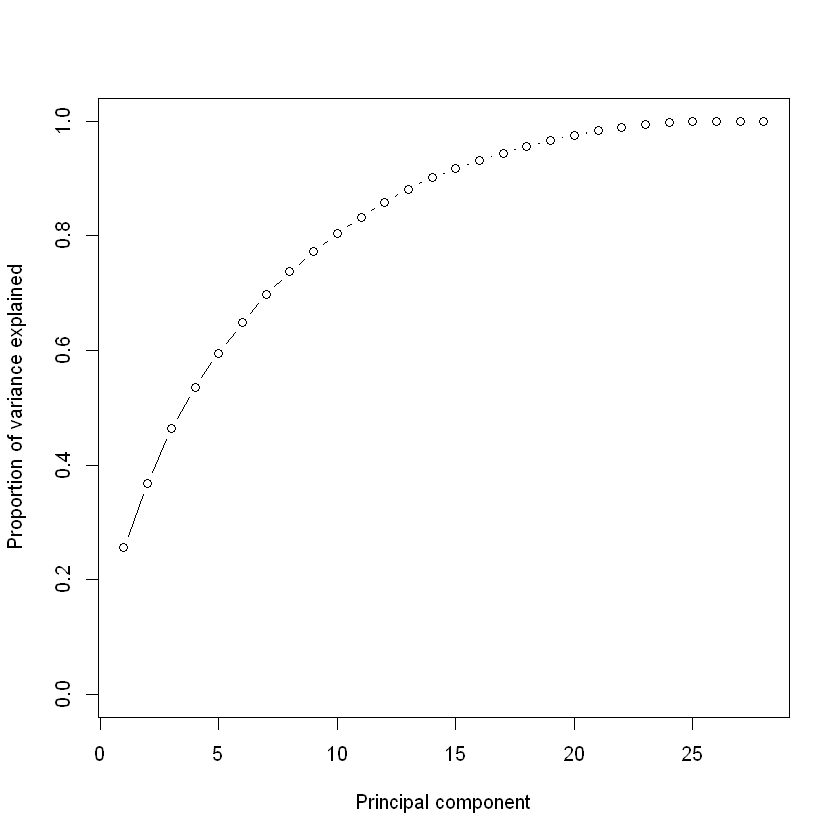

In [7]:
# PCA Scree plot without standardizing data
hpca_dfsimple <- prcomp(my_data, scale=FALSE) # Scale to 0 to 1 # We can extract the information summarized above (and much more) # from the attributes of the object hpca_dfsimple

standard_deviation_of_each_component <- hpca_dfsimple$sdev
var_per_dim <- standard_deviation_of_each_component^2
var_tot <- sum(var_per_dim)
var_tot
var_per_dim/var_tot

var_prop <- var_per_dim / sum(var_per_dim)
var_prop

cum_var <- cumsum(var_prop)
cum_var
plot(cum_var,xlab="Principal component", 
     ylab="Proportion of variance explained", ylim=c(0,1), type='b')
apply(my_data, 2, mean)
apply(my_data, 2, var)
hpca_cor <- prcomp(my_data, scale=TRUE) #Using the correlation matrix to obtain the eigenvalue #Single decomposition of the variance matrix.
standard_deviation_of_each_component <- hpca_cor$sdev
var_per_dim <- standard_deviation_of_each_component^2
var_tot <- sum(var_per_dim)
var_prop <- var_per_dim / sum(var_per_dim)
cum_var <- cumsum(var_prop)
plot(cum_var,xlab="Principal component", 
     ylab="Proportion of variance explained", ylim=c(0,1), type='b')
eigenvectors <- hpca_cor$rotation
col.norm(eigenvectors)
eigenvectors

PC_contr <- eigenvectors[,c("PC1")] # Let us plot the contribution of the original dimension to the 1st PCA # PC_contr
ord <- order( -abs(PC_contr) )# We order by the magnitude of the contribution # We use the - sign because we want a descending order
PC_contr <- PC_contr[ord] #PC_contr

Loading Bars for 12 Dimensions# 

iwsp       watp       tles       tmor       uiws       pcar       phom 
-0.3155357 -0.3091830  0.2966464  0.2845224  0.2569963 -0.2565437 -0.2508930

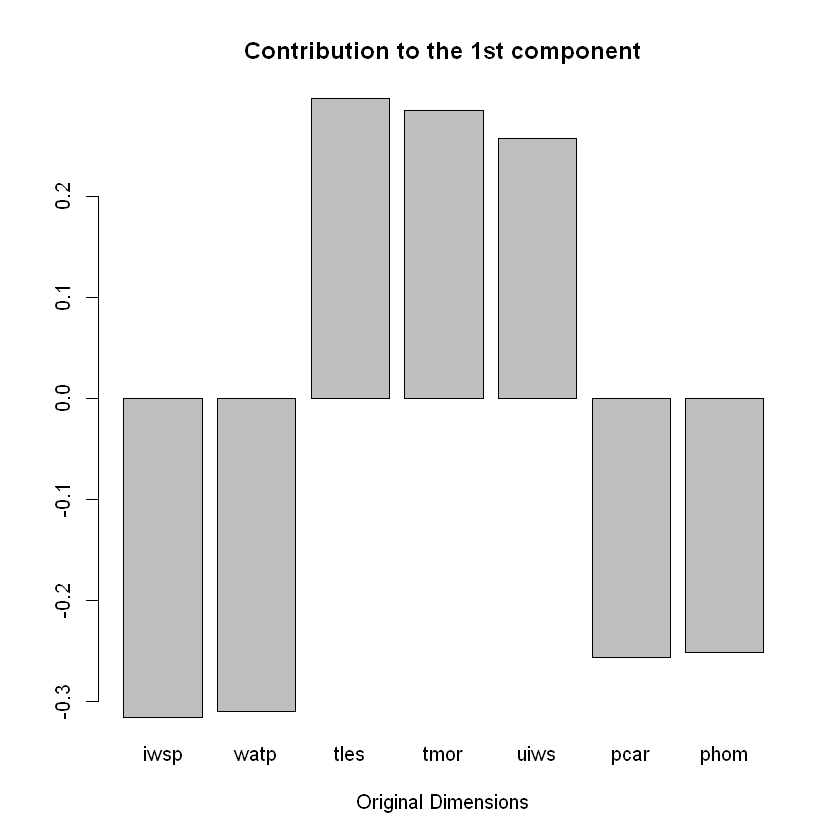

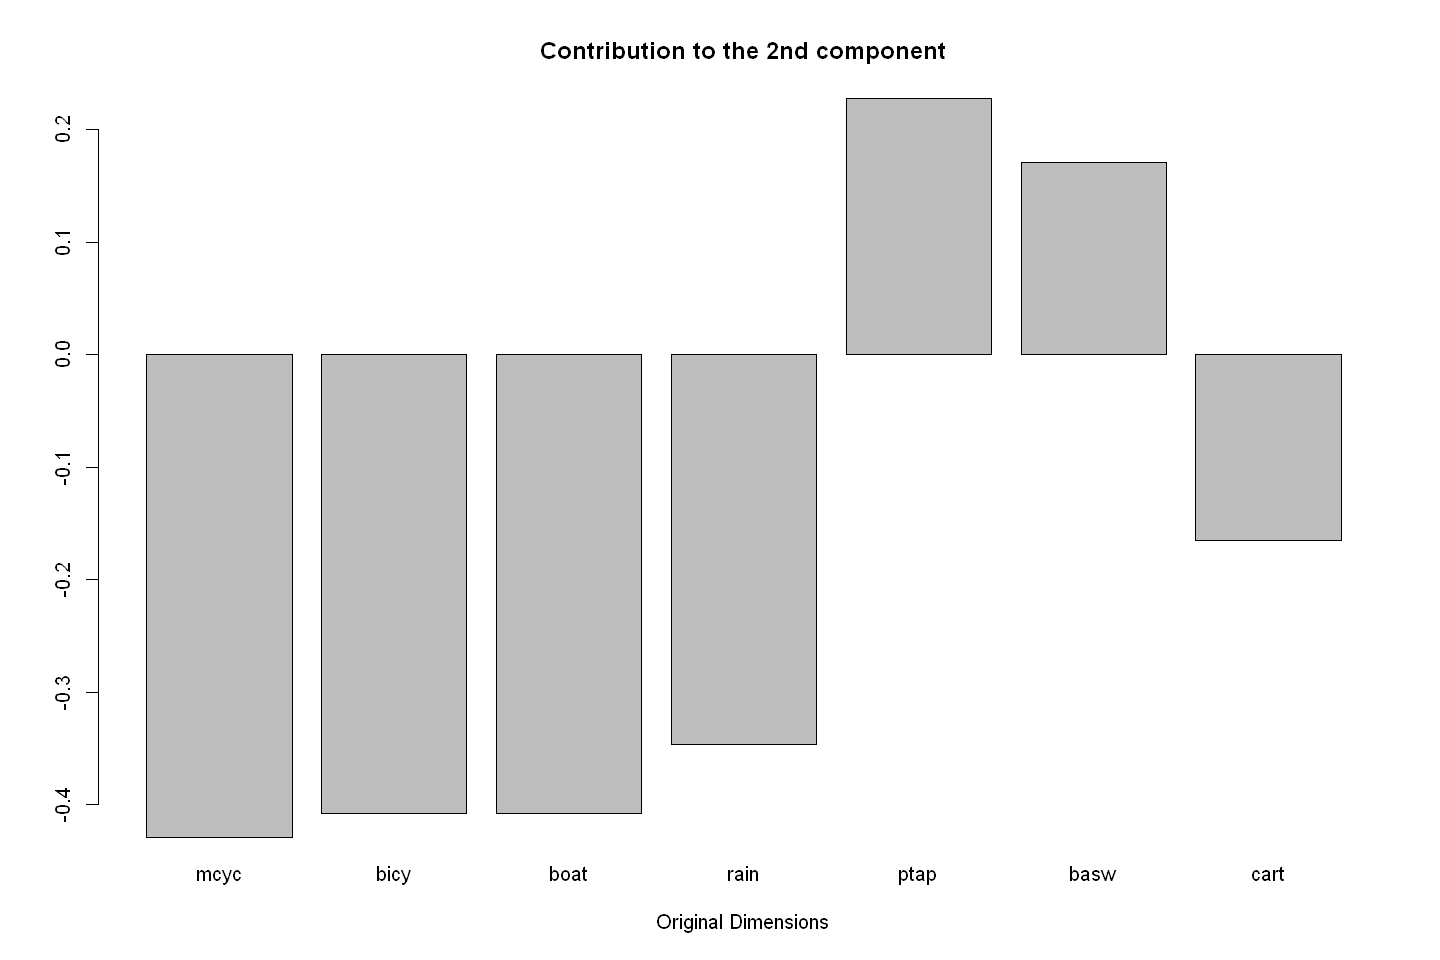

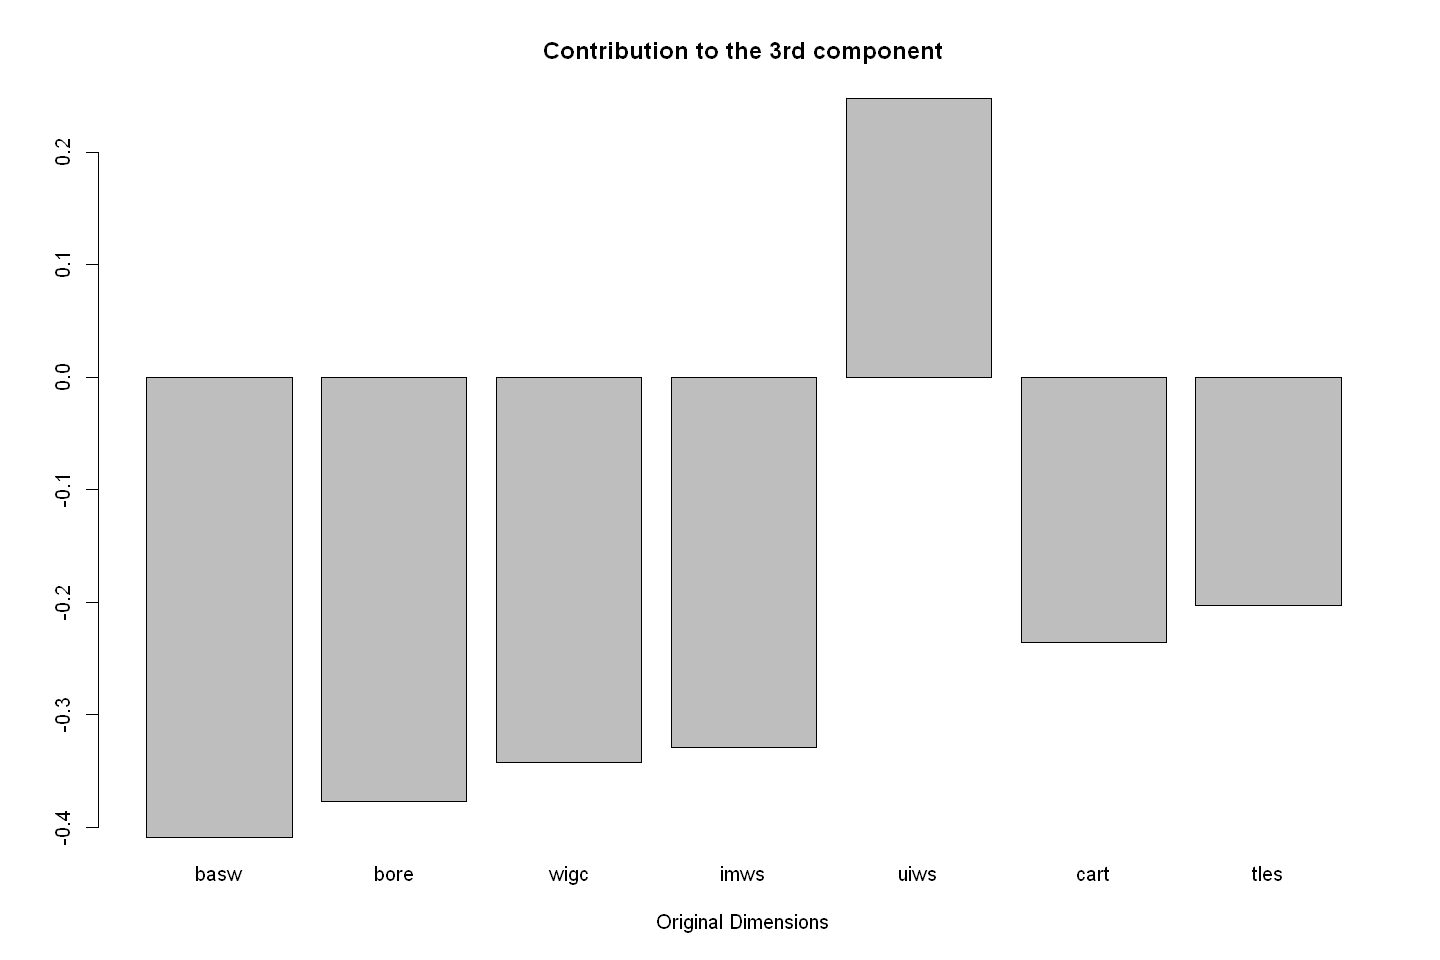

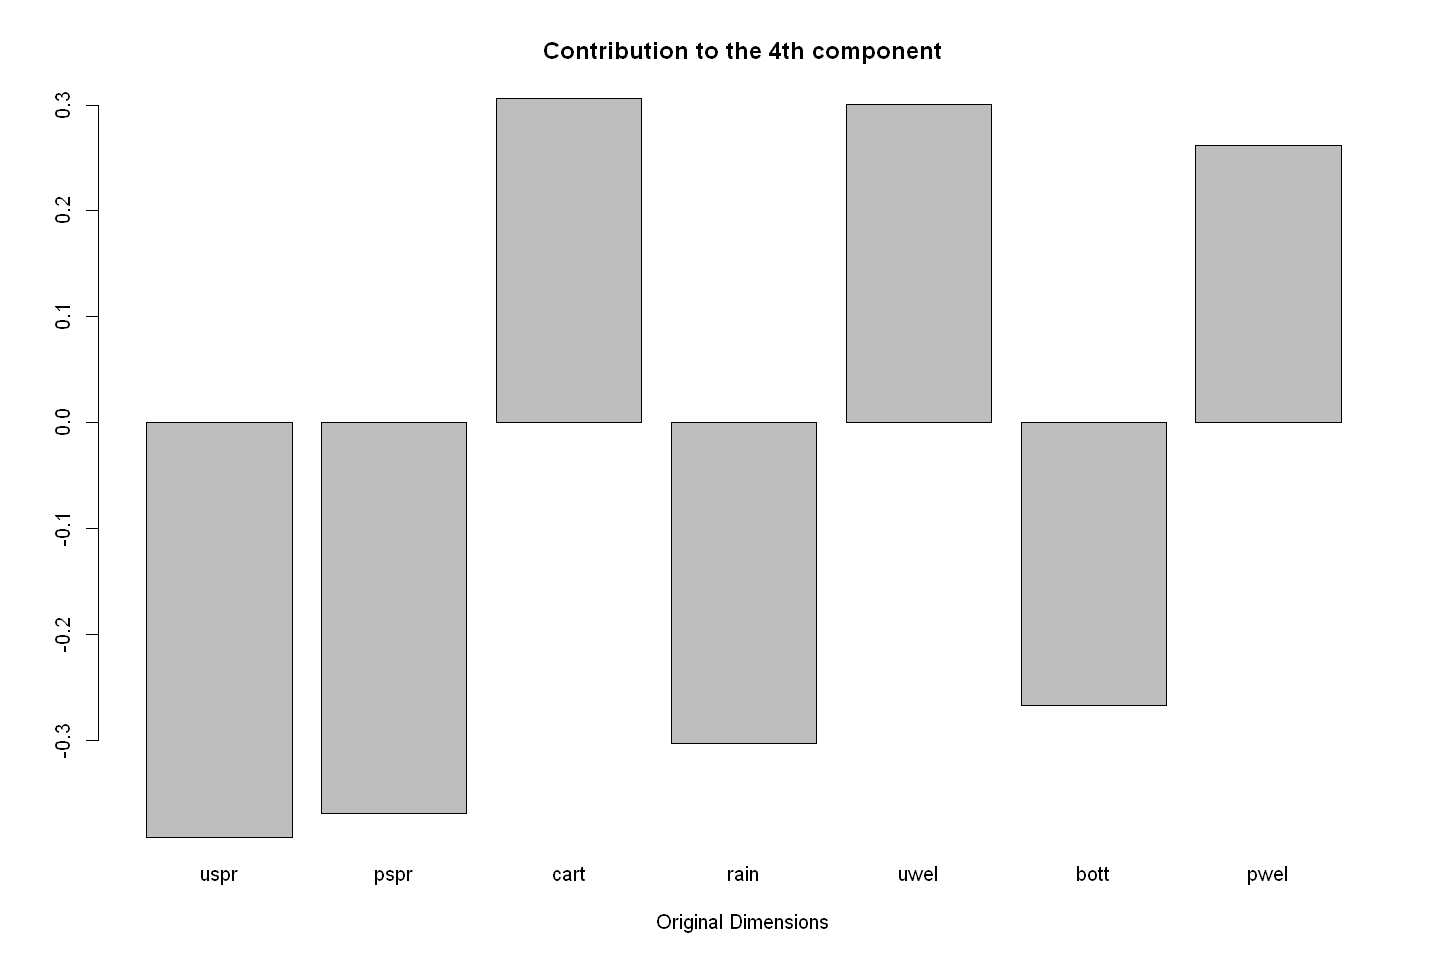

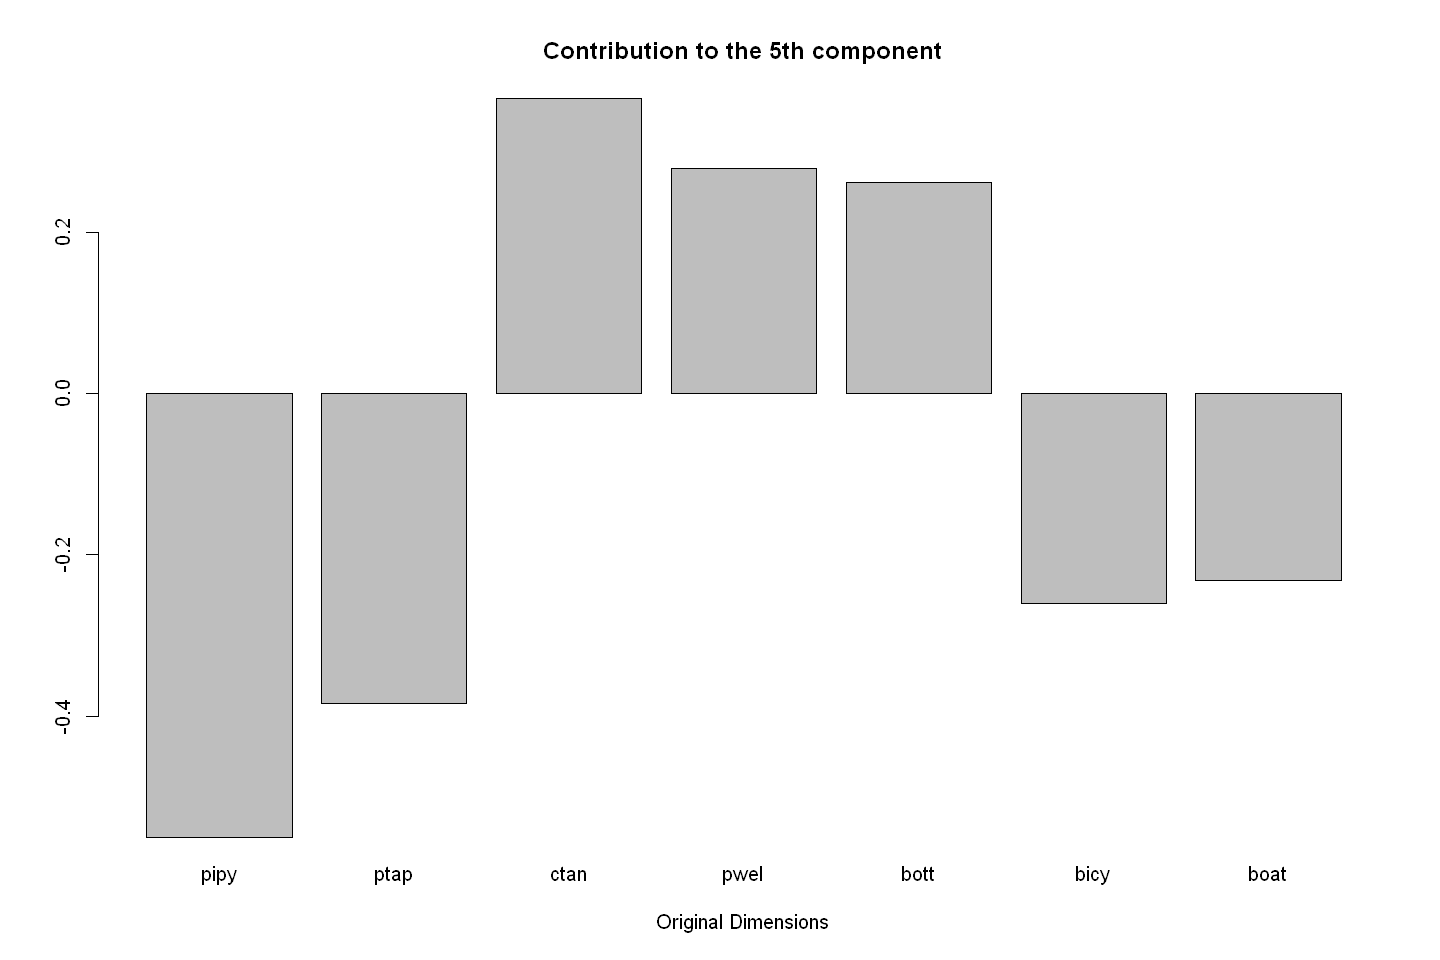

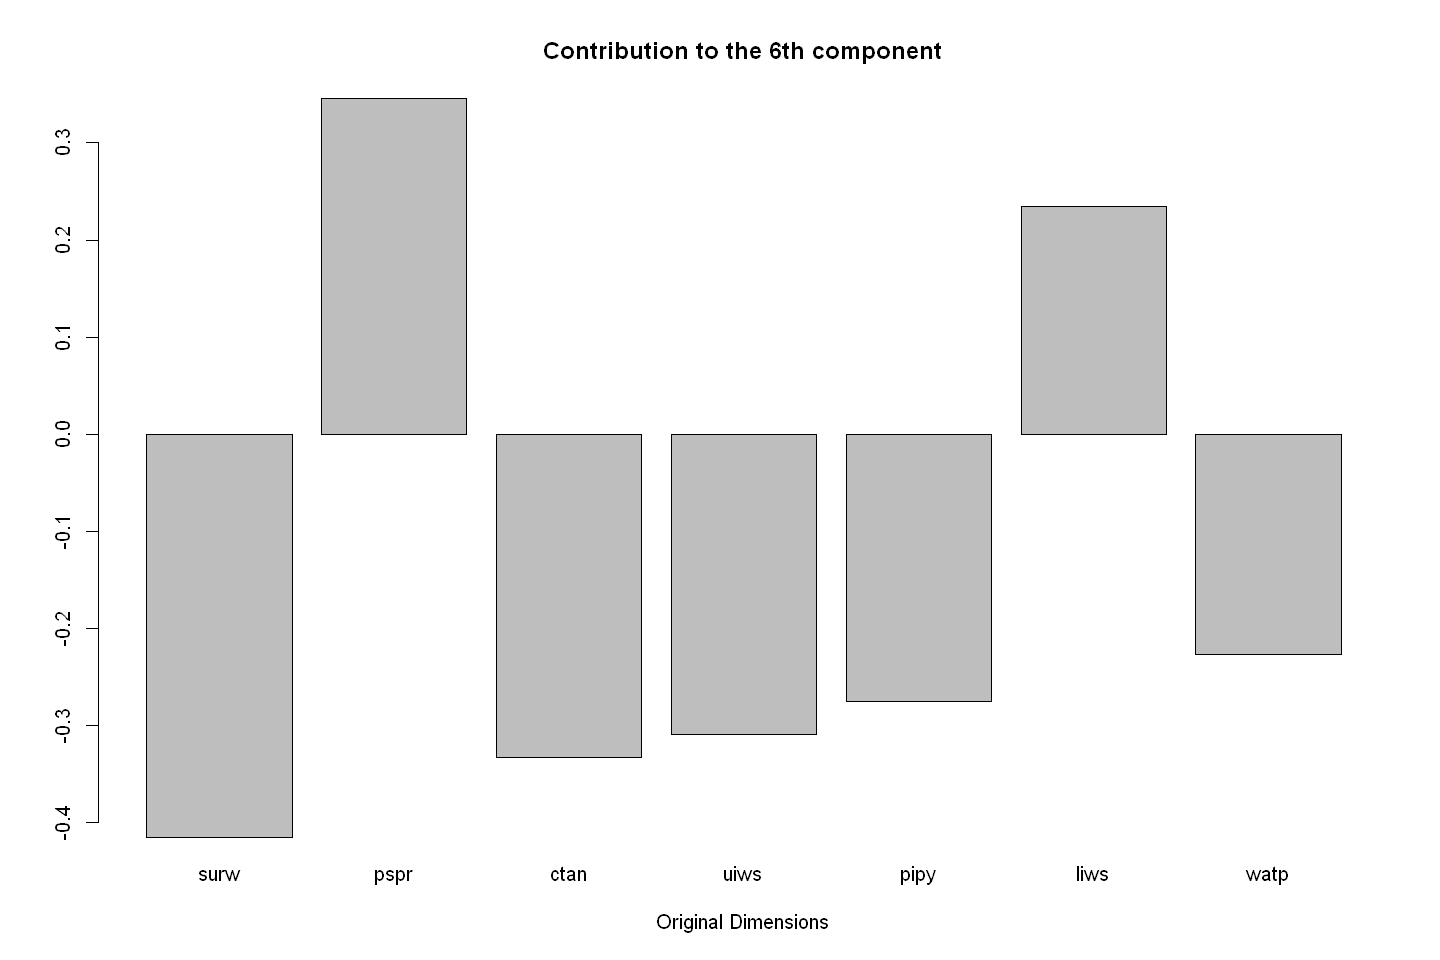

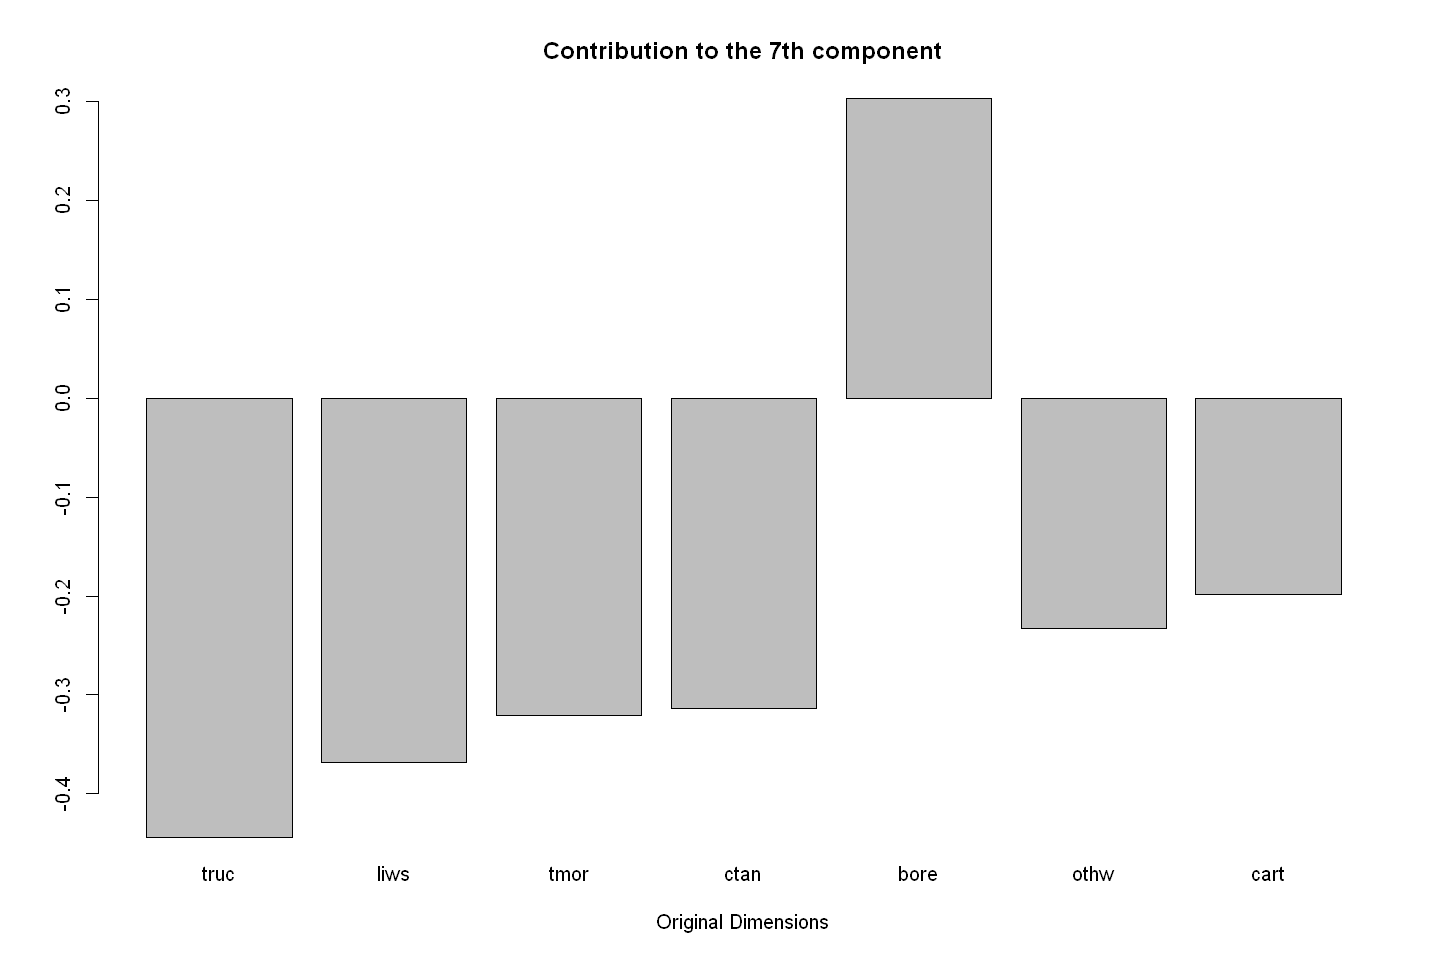

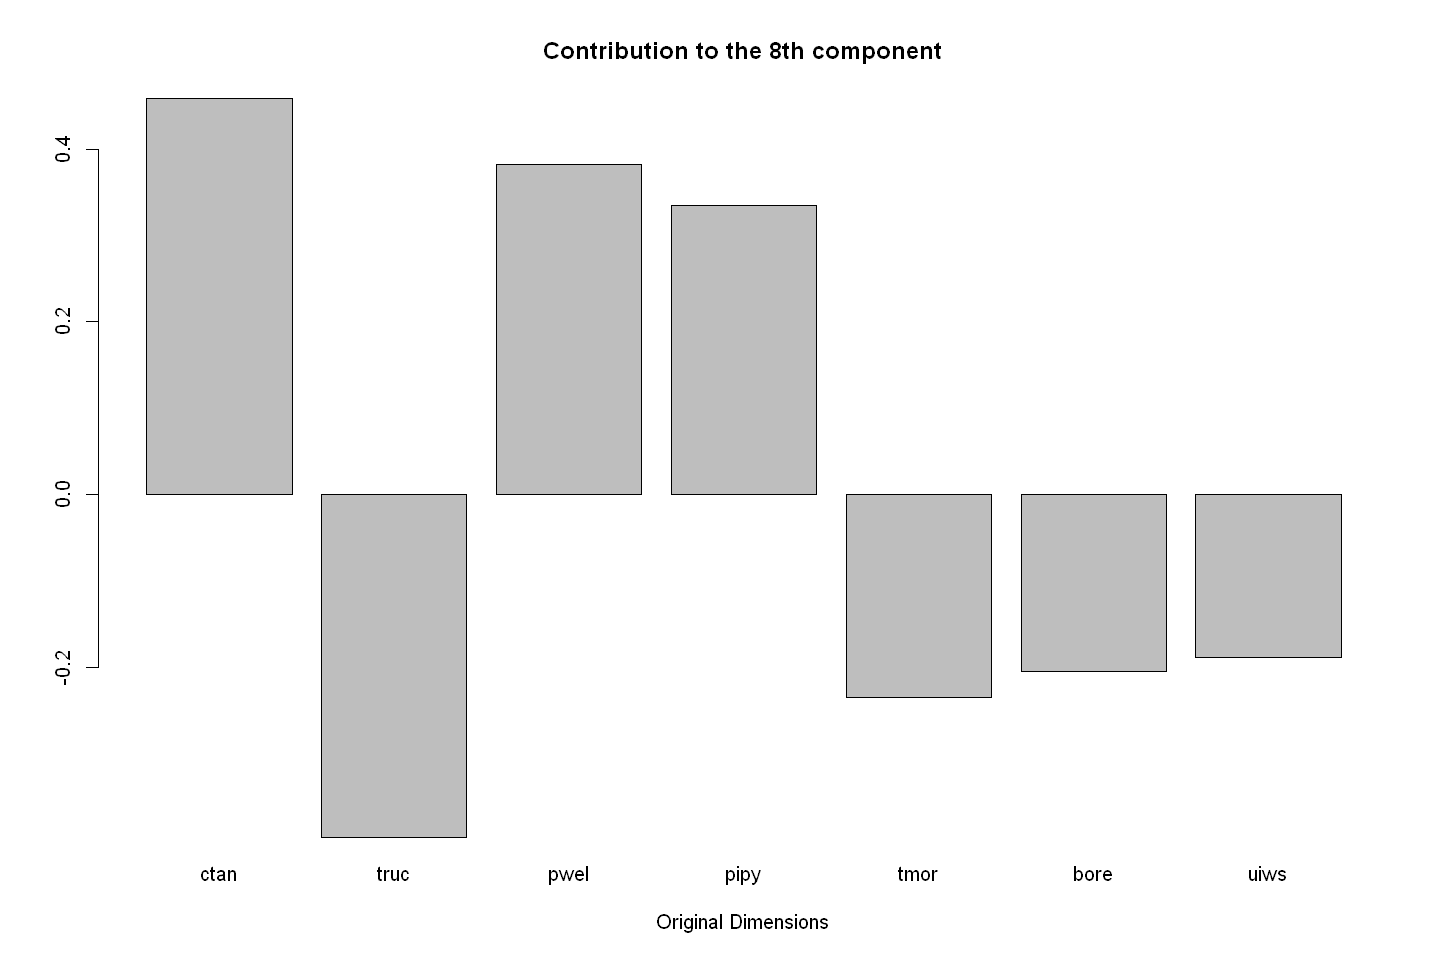

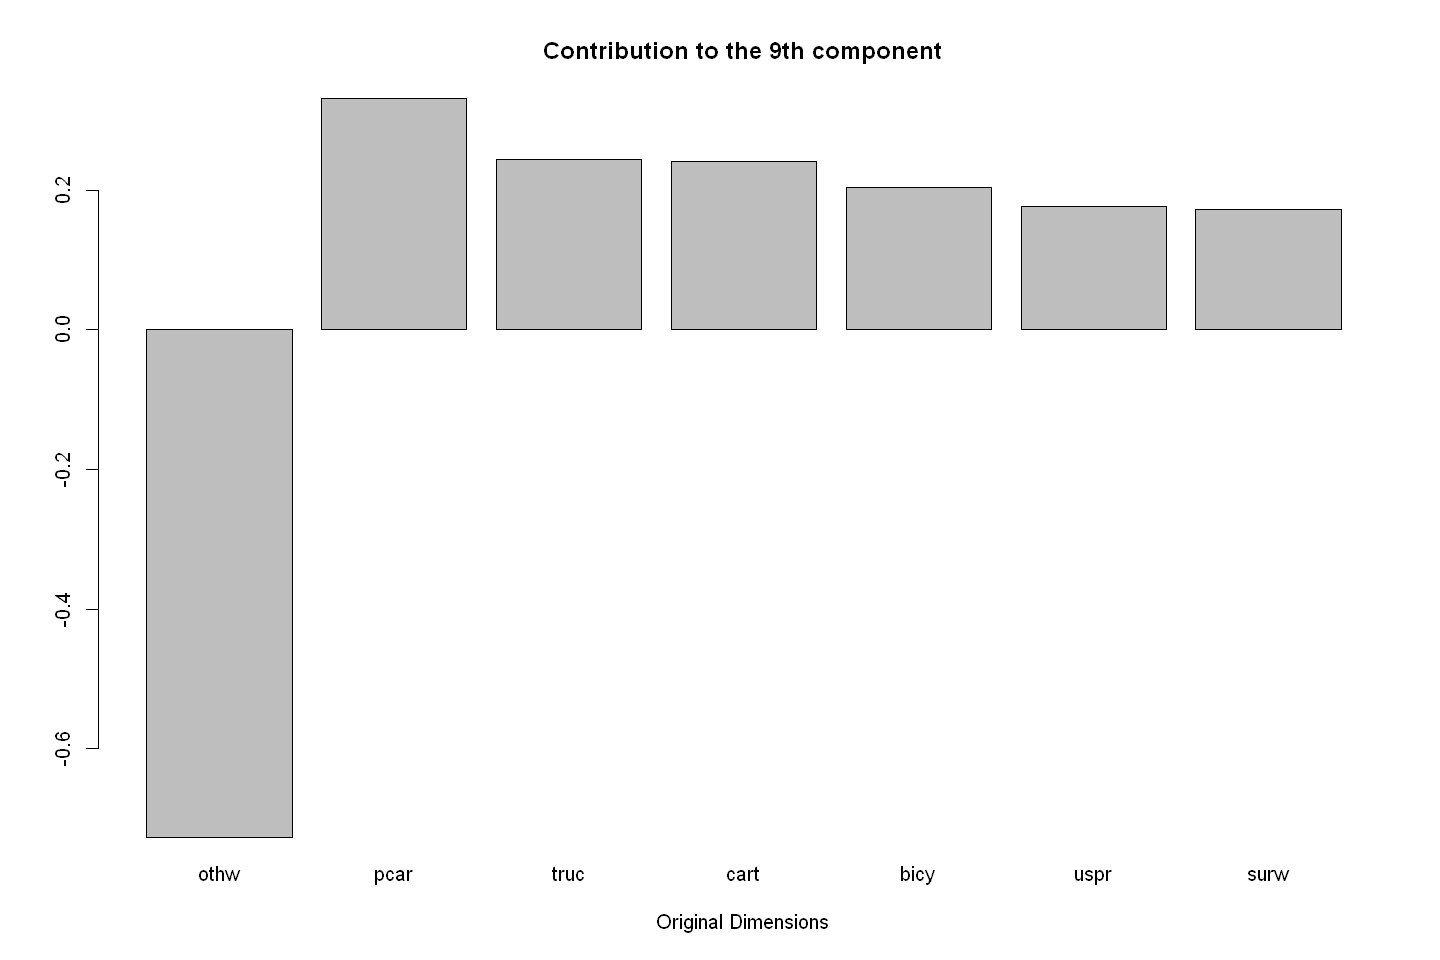

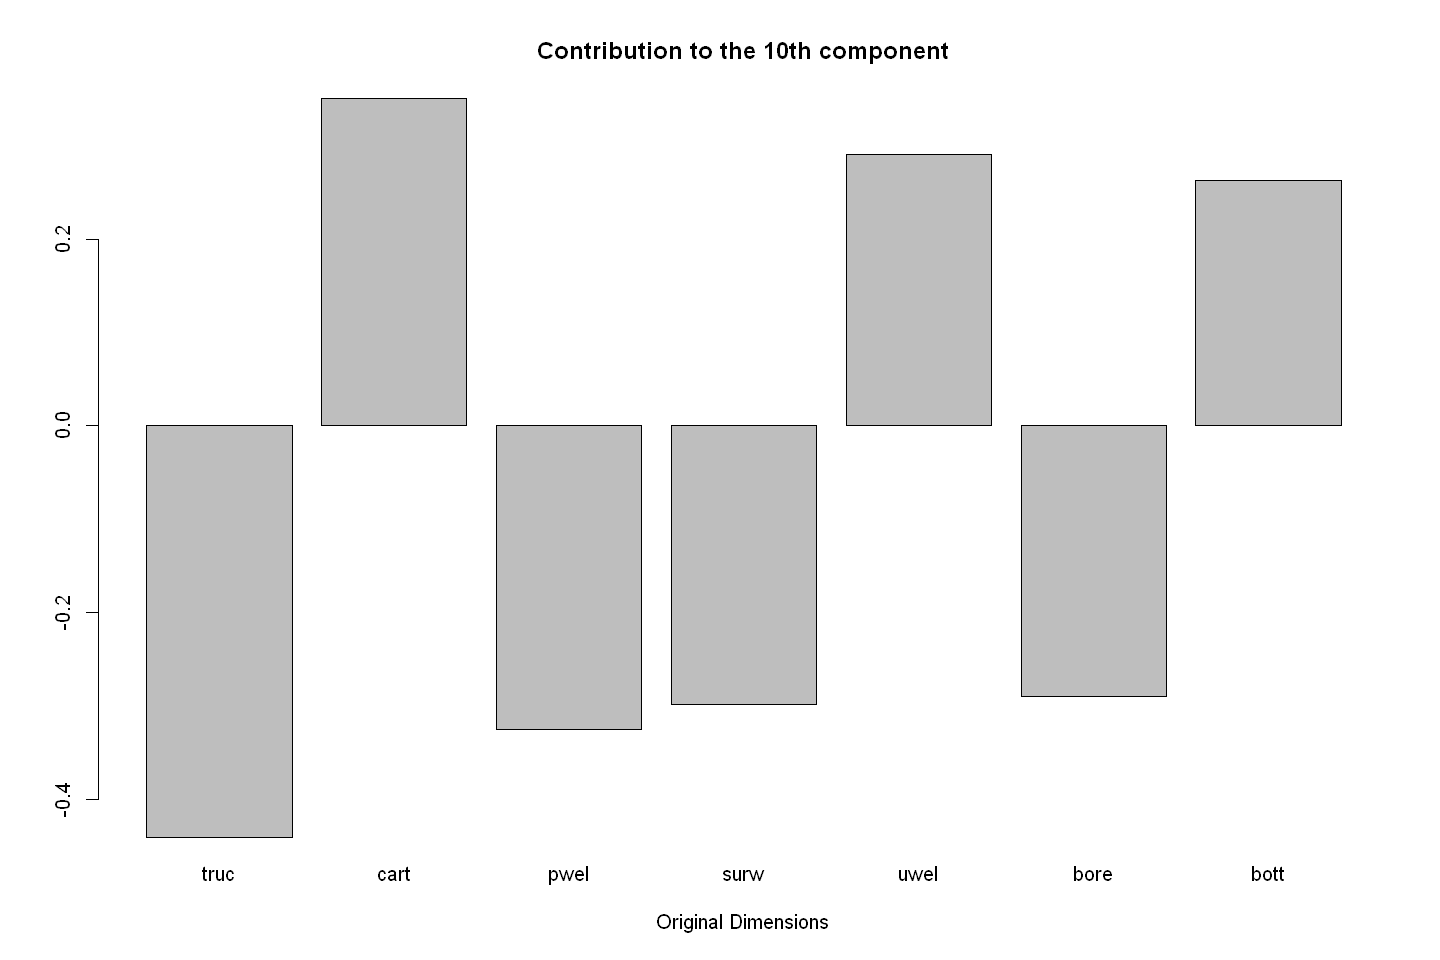

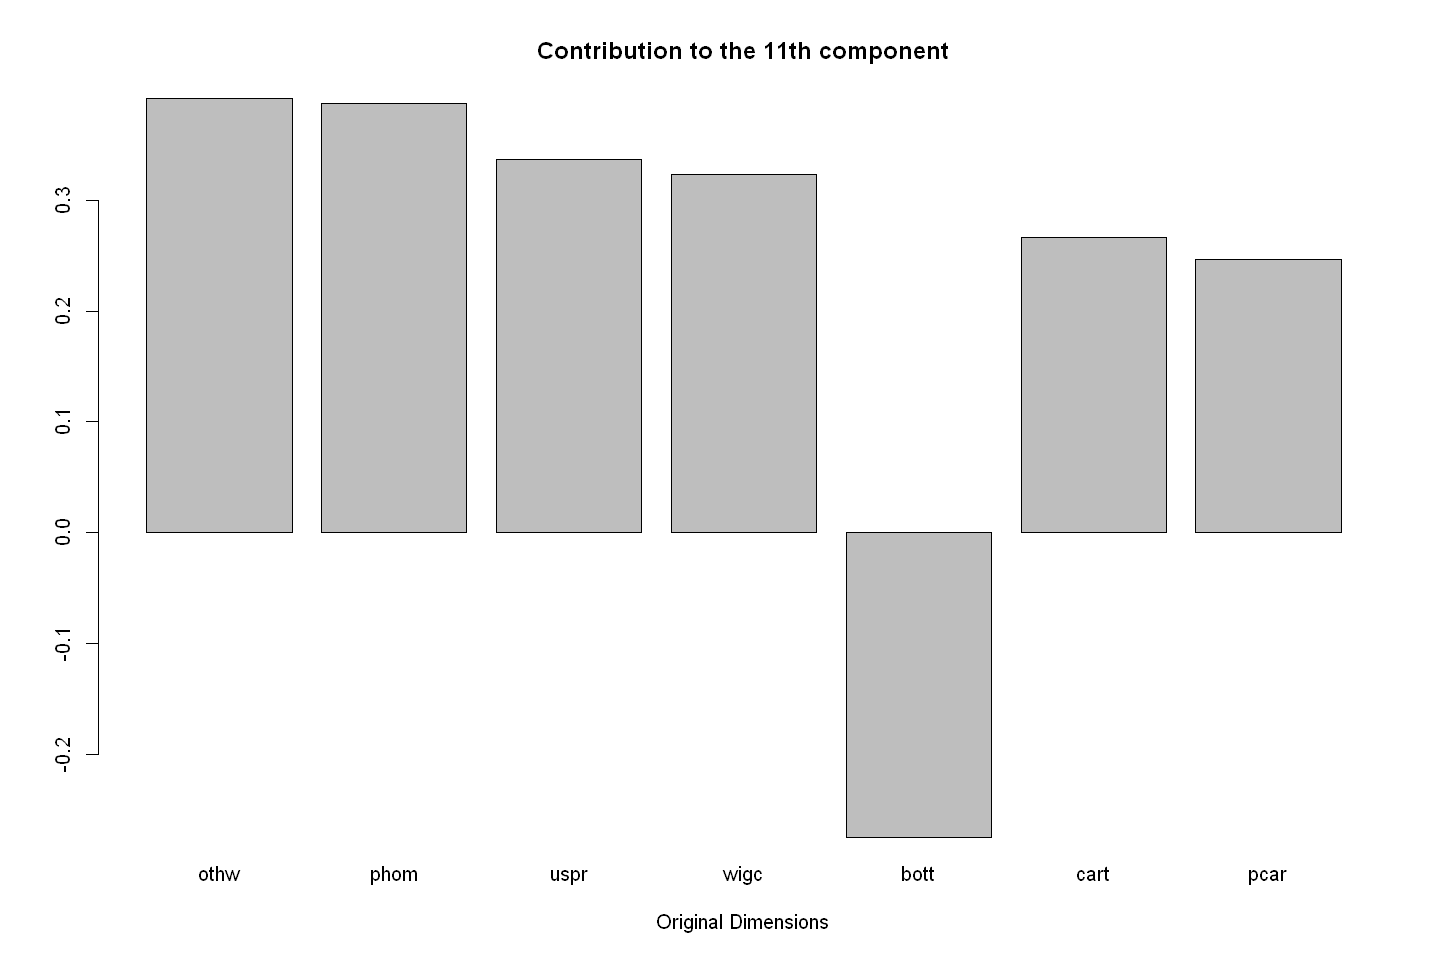

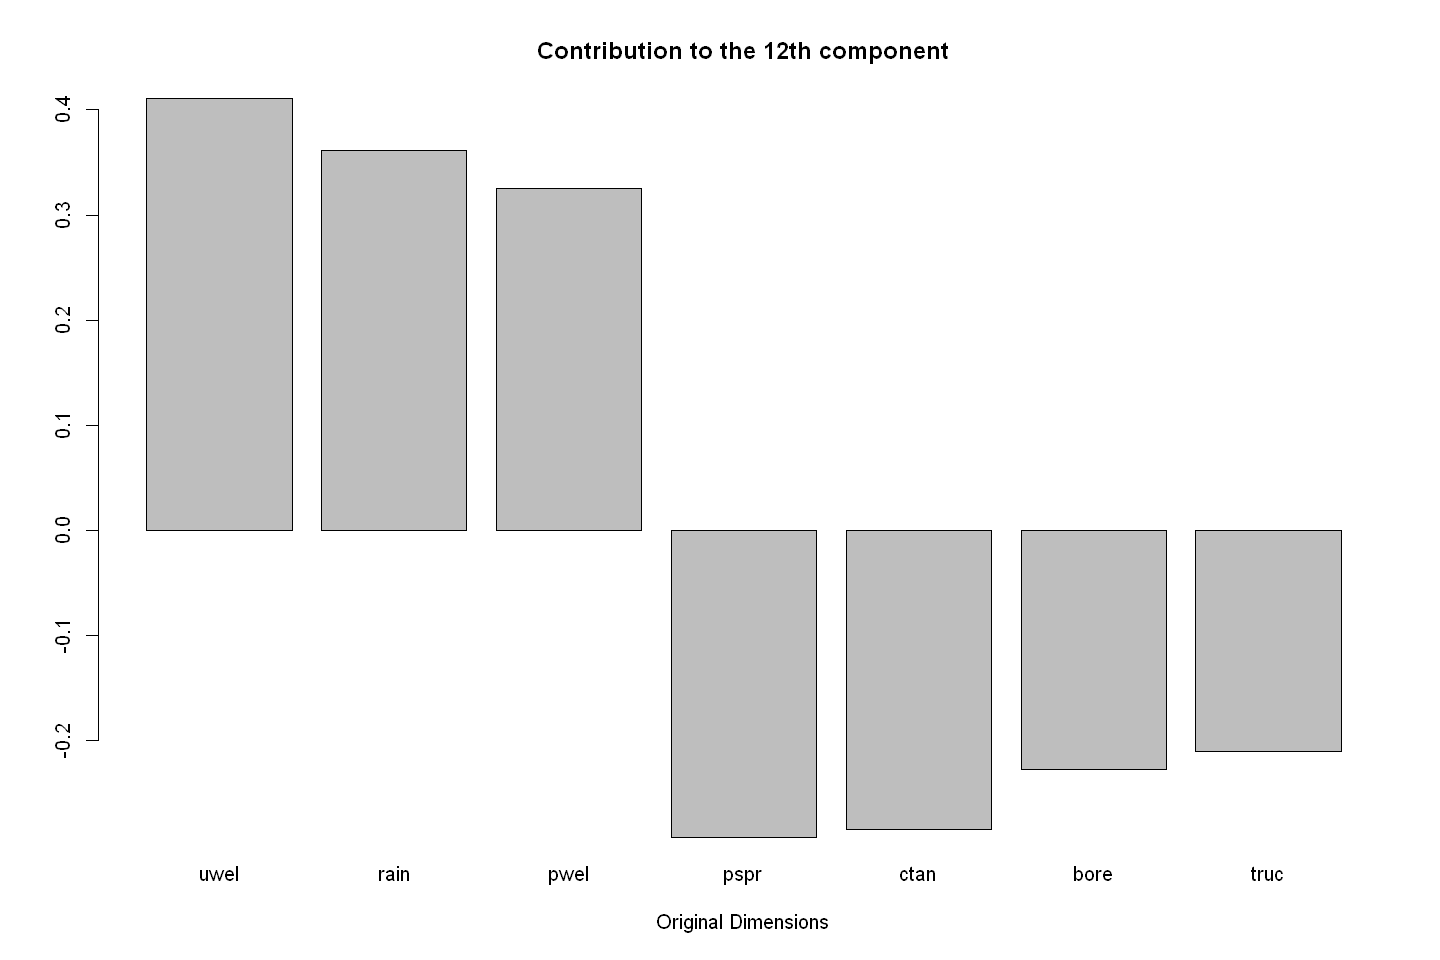

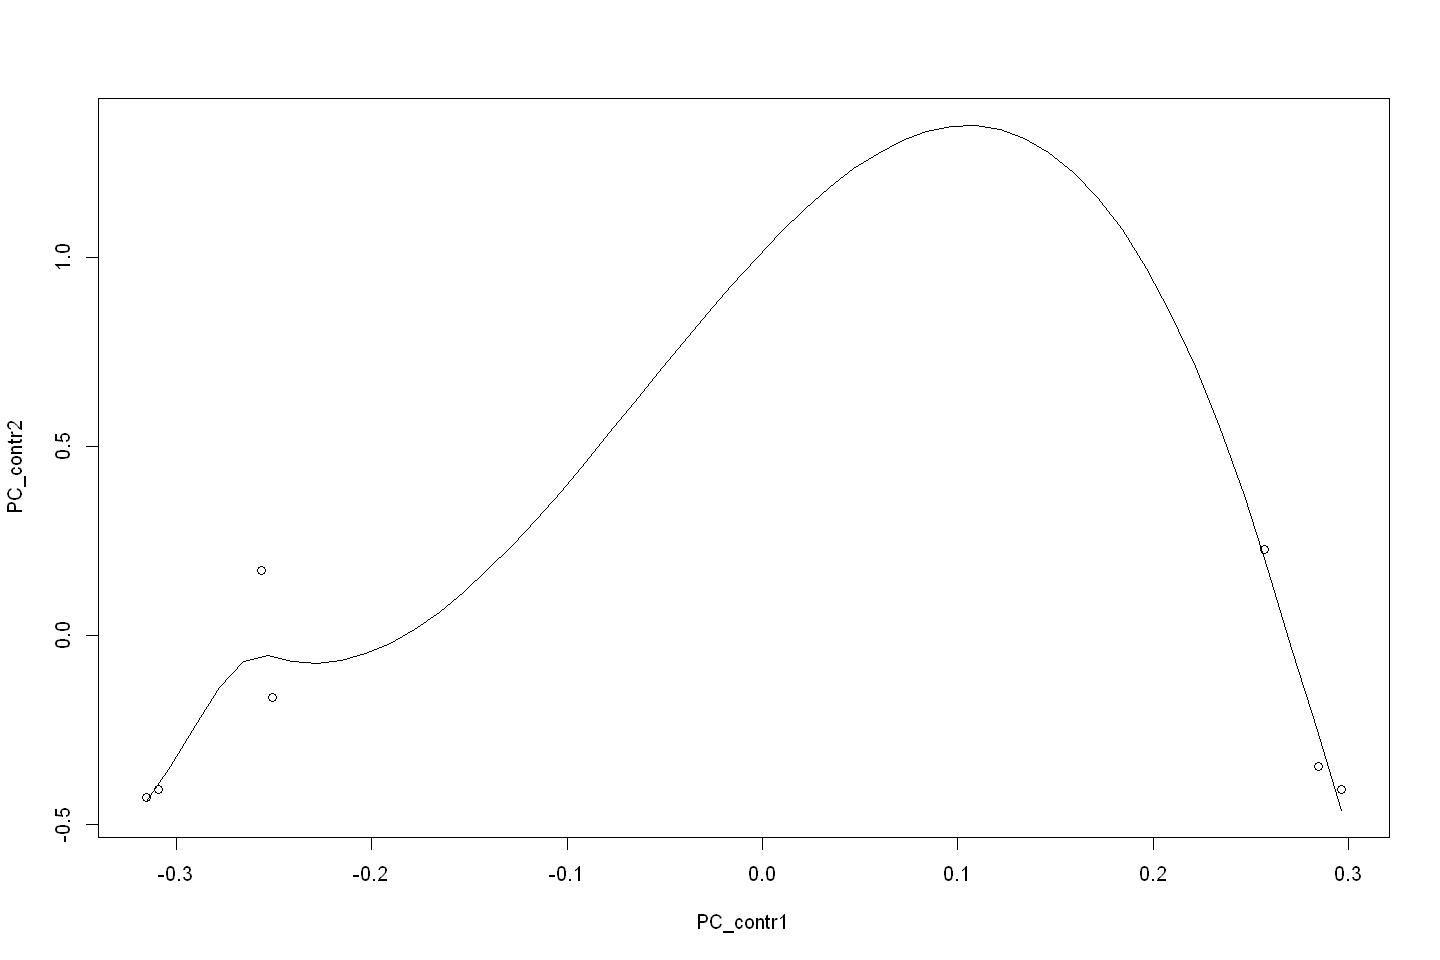

In [8]:
PC_contr1 <- PC_contr[1:7] # We just select the 7 highest contributing dimensions (highest loading)
PC_contr1
barplot(PC_contr1, main="Contribution to the 1st component", xlab="Original Dimensions") 

# Second principal component vector
PC_contr <- eigenvectors[,c("PC2")] # We order by the magnitude of the contribution
ord <- order( -abs(PC_contr) ) # We use the - sign because we want a descending order
PC_contr <- PC_contr[ord]
PC_contr2 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr2, main="Contribution to the 2nd component",xlab="Original Dimensions") 
# Third principal component vector
PC_contr <- eigenvectors[,c("PC3")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr3 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr3, main="Contribution to the 3rd component",xlab="Original Dimensions") 
# 4 principal component vector
PC_contr <- eigenvectors[,c("PC4")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr4 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr4, main="Contribution to the 4th component",xlab="Original Dimensions") 
# 5 principal component vector
PC_contr <- eigenvectors[,c("PC5")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr5 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr5, main="Contribution to the 5th component",xlab="Original Dimensions") 
# 6 principal component vector
PC_contr <- eigenvectors[,c("PC6")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr6 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr6, main="Contribution to the 6th component",xlab="Original Dimensions") 
# 7 principal component vector
PC_contr <- eigenvectors[,c("PC7")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr7 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr7, main="Contribution to the 7th component",xlab="Original Dimensions") 
# 8 principal component vector
PC_contr <- eigenvectors[,c("PC8")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr8 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr8, main="Contribution to the 8th component",xlab="Original Dimensions") 
# 9 principal component vector
PC_contr <- eigenvectors[,c("PC9")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr9 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr9, main="Contribution to the 9th component",xlab="Original Dimensions") 
# 10 principal component vector
PC_contr <- eigenvectors[,c("PC10")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr10 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr10, main="Contribution to the 10th component",xlab="Original Dimensions") 
# 11 principal component vector
PC_contr <- eigenvectors[,c("PC11")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr11 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr11, main="Contribution to the 11th component",xlab="Original Dimensions") 
# 12 principal component vector
PC_contr <- eigenvectors[,c("PC12")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr12 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr12, main="Contribution to the 12th component",xlab="Original Dimensions")
scatter.smooth(PC_contr1,PC_contr2)

# Basics PCA with Color Visualization

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 78 individuals, described by 28 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,7.182730493,25.652608903,25.65261
Dim.2,3.137744607,11.206230738,36.85884
Dim.3,2.658327328,9.494026172,46.35287
Dim.4,2.039027949,7.282242675,53.63511
Dim.5,1.662758073,5.938421689,59.57353
Dim.6,1.480061334,5.285933335,64.85946
Dim.7,1.374772720,4.909902570,69.76937
Dim.8,1.107867609,3.956670034,73.72604
Dim.9,0.991605050,3.541446606,77.26748
Dim.10,0.873481788,3.119577814,80.38706


Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
imws,-0.62462904,-0.12191218,0.53631671,-0.03434945,0.0230807671
phom,-0.67240859,-0.26654108,-0.29297270,-0.27743504,-0.0496585938
pipy,-0.18169152,-0.18925116,0.09778715,-0.04756553,0.7101500897
ptap,0.47123982,-0.40354955,0.23300018,-0.05134845,0.4961872343
bore,0.24162461,0.26405712,0.61512590,-0.19842252,-0.2264668275
pwel,0.35745209,0.14897659,0.01697436,-0.37352643,-0.3595724175
pspr,0.31498220,-0.28909501,0.06429949,0.52736410,0.0421961793
rain,-0.19097008,0.61365834,-0.12050656,0.43202099,0.2201255312
truc,-0.17313675,-0.24292252,-0.18908296,-0.11044023,-0.1704368787
ctan,-0.03035595,0.10839804,0.07033020,0.15621252,-0.4722394475


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
imws,0.3901614317,0.0148625807,0.287635613,1.179885e-03,5.327218e-04
phom,0.4521333091,0.0710441468,0.085833004,7.697020e-02,2.465976e-03
pipy,0.0330118082,0.0358160029,0.009562327,2.262480e-03,5.043131e-01
ptap,0.2220669680,0.1628522408,0.054289083,2.636663e-03,2.462018e-01
bore,0.0583824518,0.0697261610,0.378379873,3.937150e-02,5.128722e-02
pwel,0.1277719967,0.0221940247,0.000288129,1.395220e-01,1.292923e-01
pspr,0.0992137878,0.0835759231,0.004134424,2.781129e-01,1.780518e-03
rain,0.0364695701,0.3765765611,0.014521832,1.866421e-01,4.845525e-02
truc,0.0299763353,0.0590113509,0.035752367,1.219705e-02,2.904873e-02
ctan,0.0009214840,0.0117501344,0.004946337,2.440235e-02,2.230101e-01


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
imws,5.431937507,0.47367082,10.82017288,0.057865065,3.203844e-02
phom,6.294727465,2.26417876,3.22883504,3.774847876,1.483064e-01
pipy,0.459599706,1.14145692,0.35971217,0.110958732,3.032992e+01
ptap,3.091678969,5.19010504,2.04222716,0.129309808,1.480683e+01
bore,0.812816962,2.22217451,14.23375778,1.930895436,3.084467e+00
pwel,1.778877779,0.70732413,0.01083873,6.842574002,7.775775e+00
pspr,1.381282340,2.66356678,0.15552728,13.639483899,1.070822e-01
rain,0.507739641,12.00150453,0.54627705,9.153485942,2.914149e+00
truc,0.417338996,1.88069325,1.34491967,0.598179416,1.747021e+00
ctan,0.012829160,0.37447708,0.18606952,1.196763915,1.341206e+01


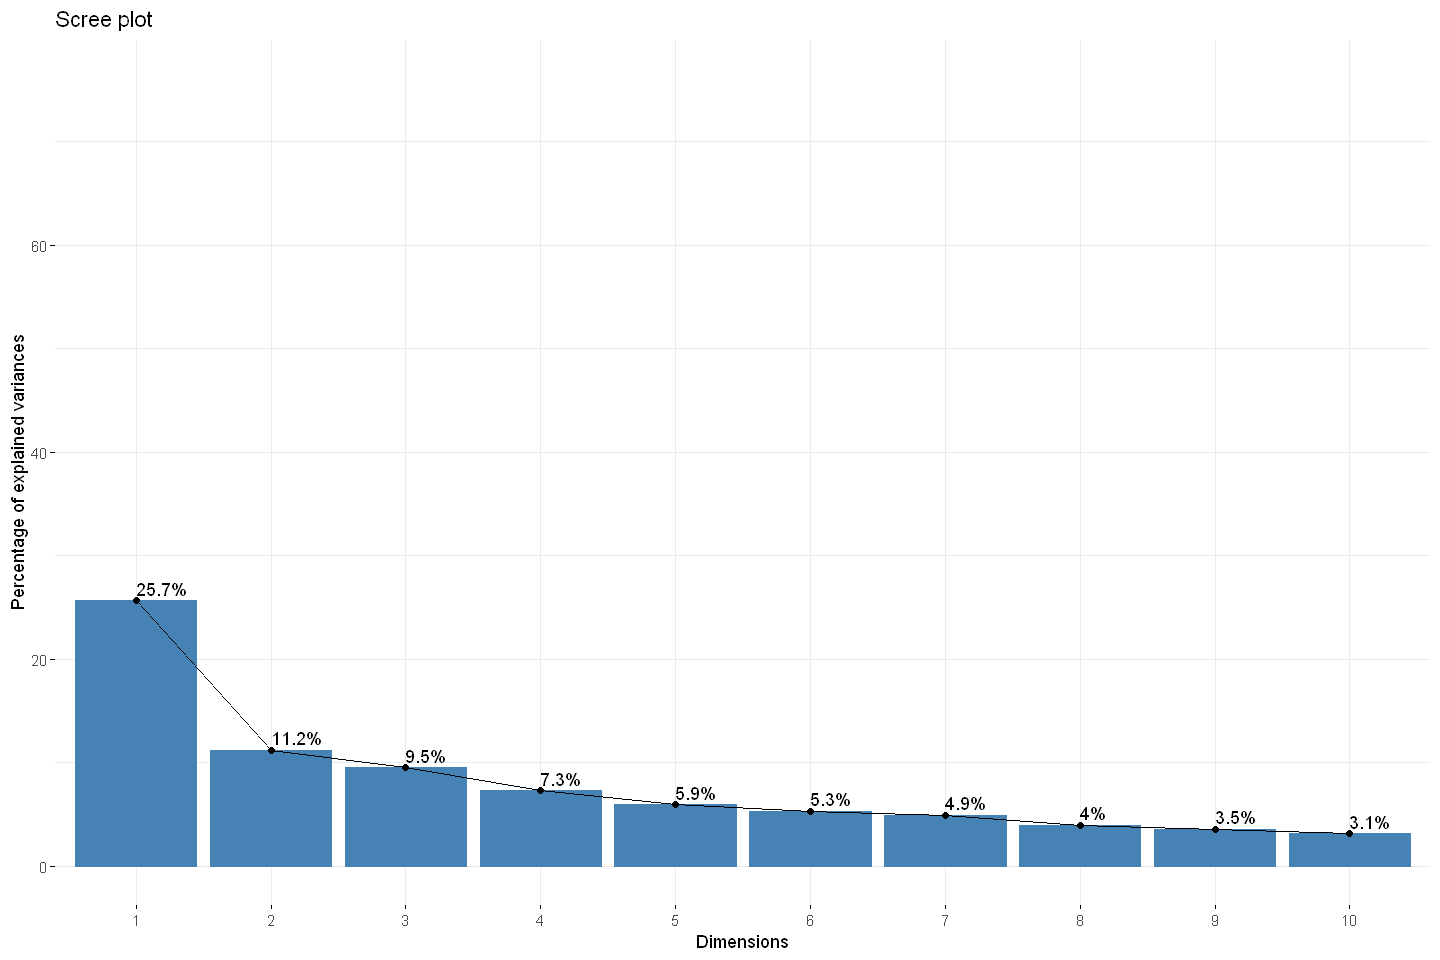

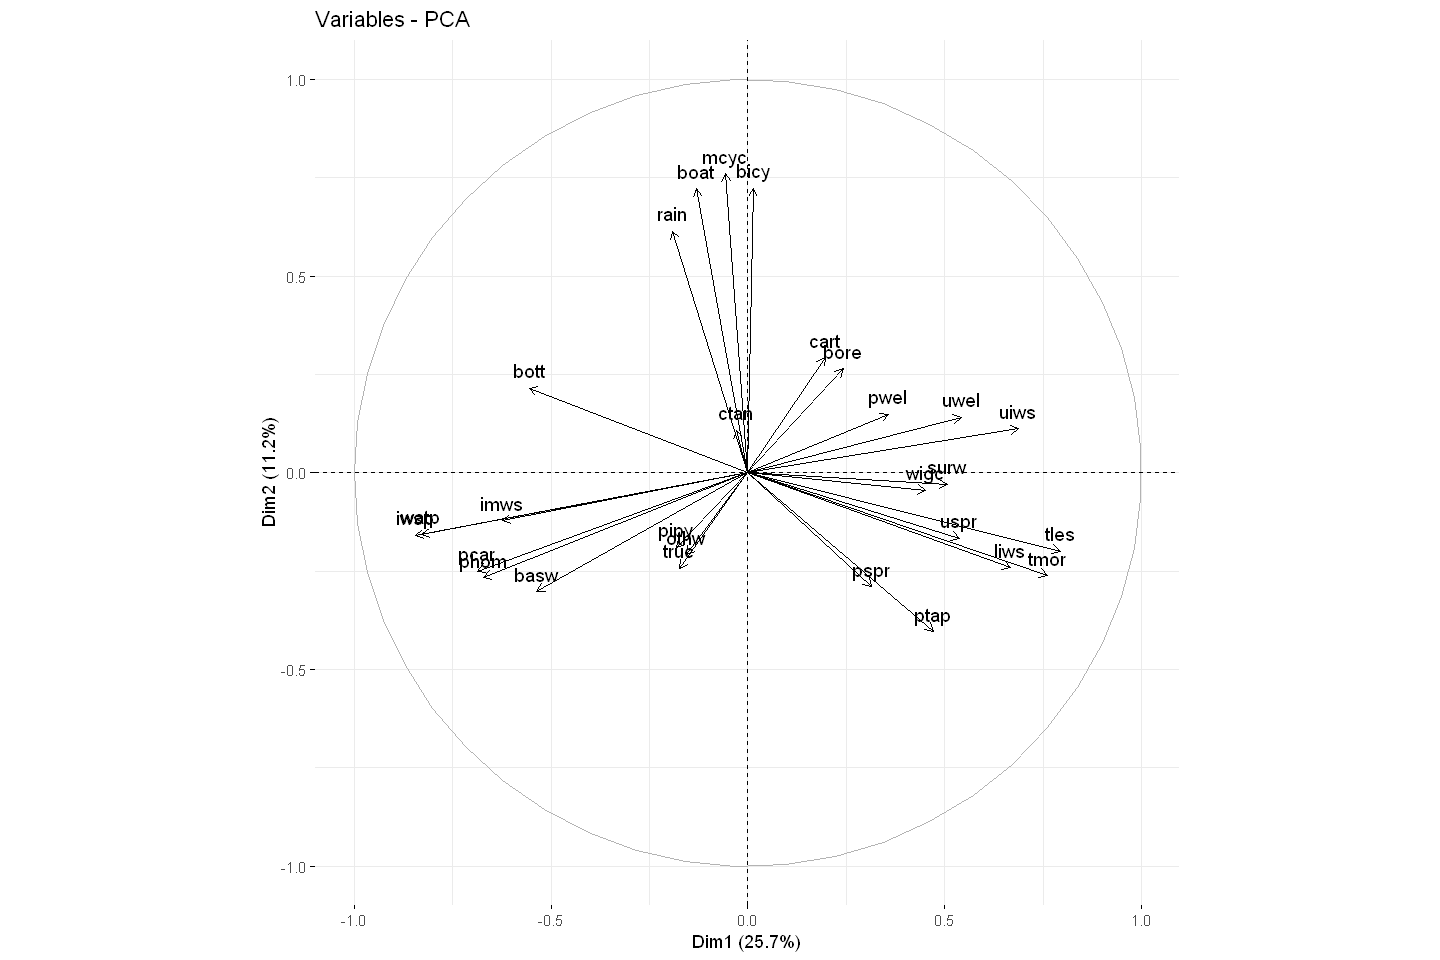

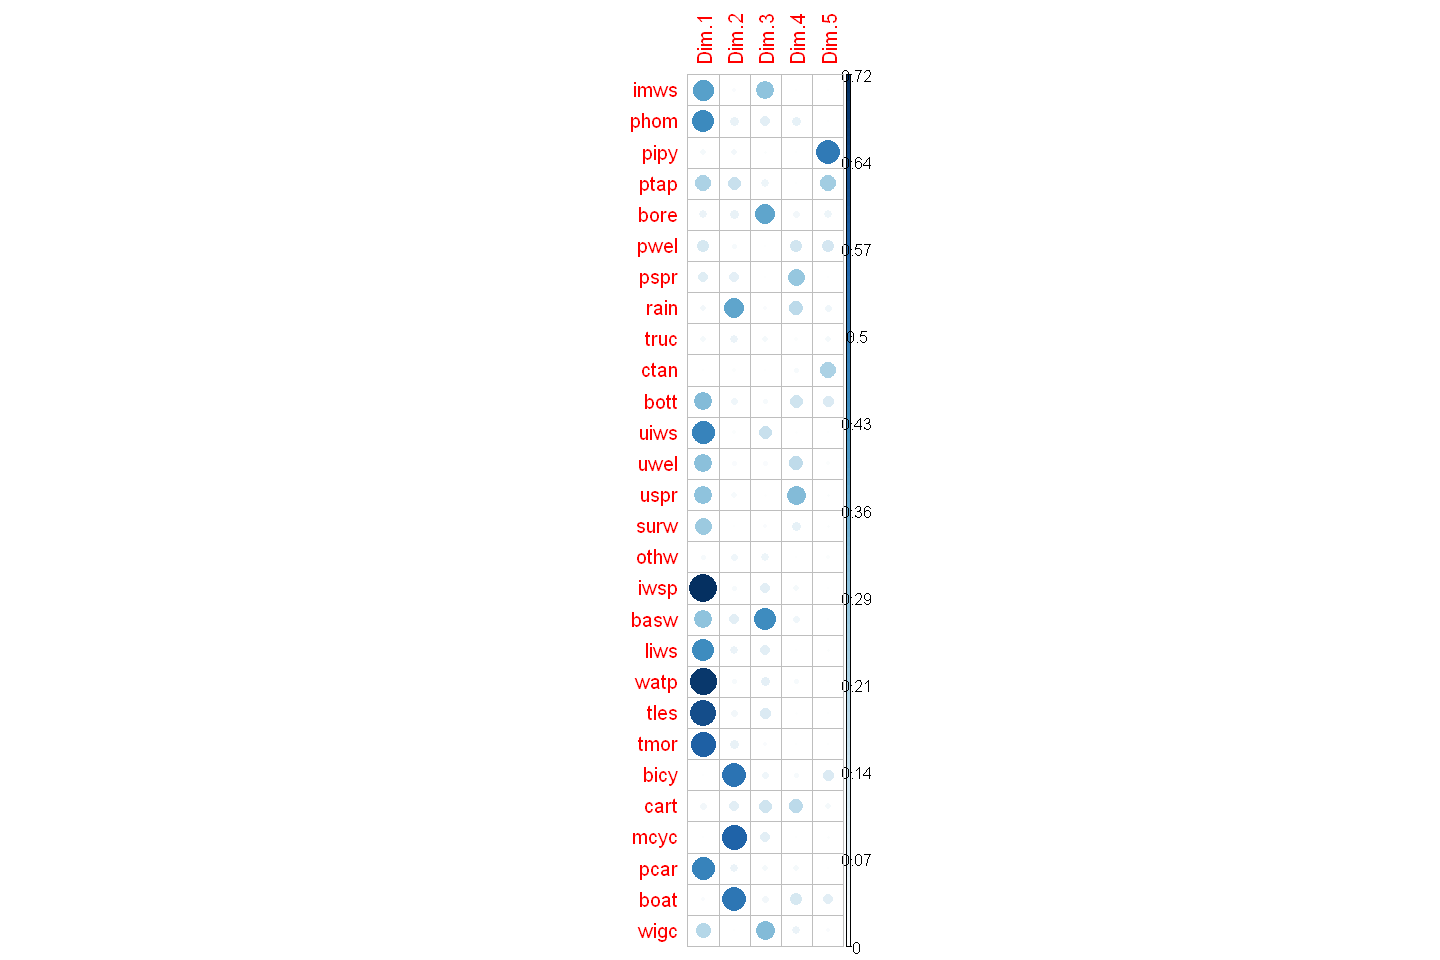

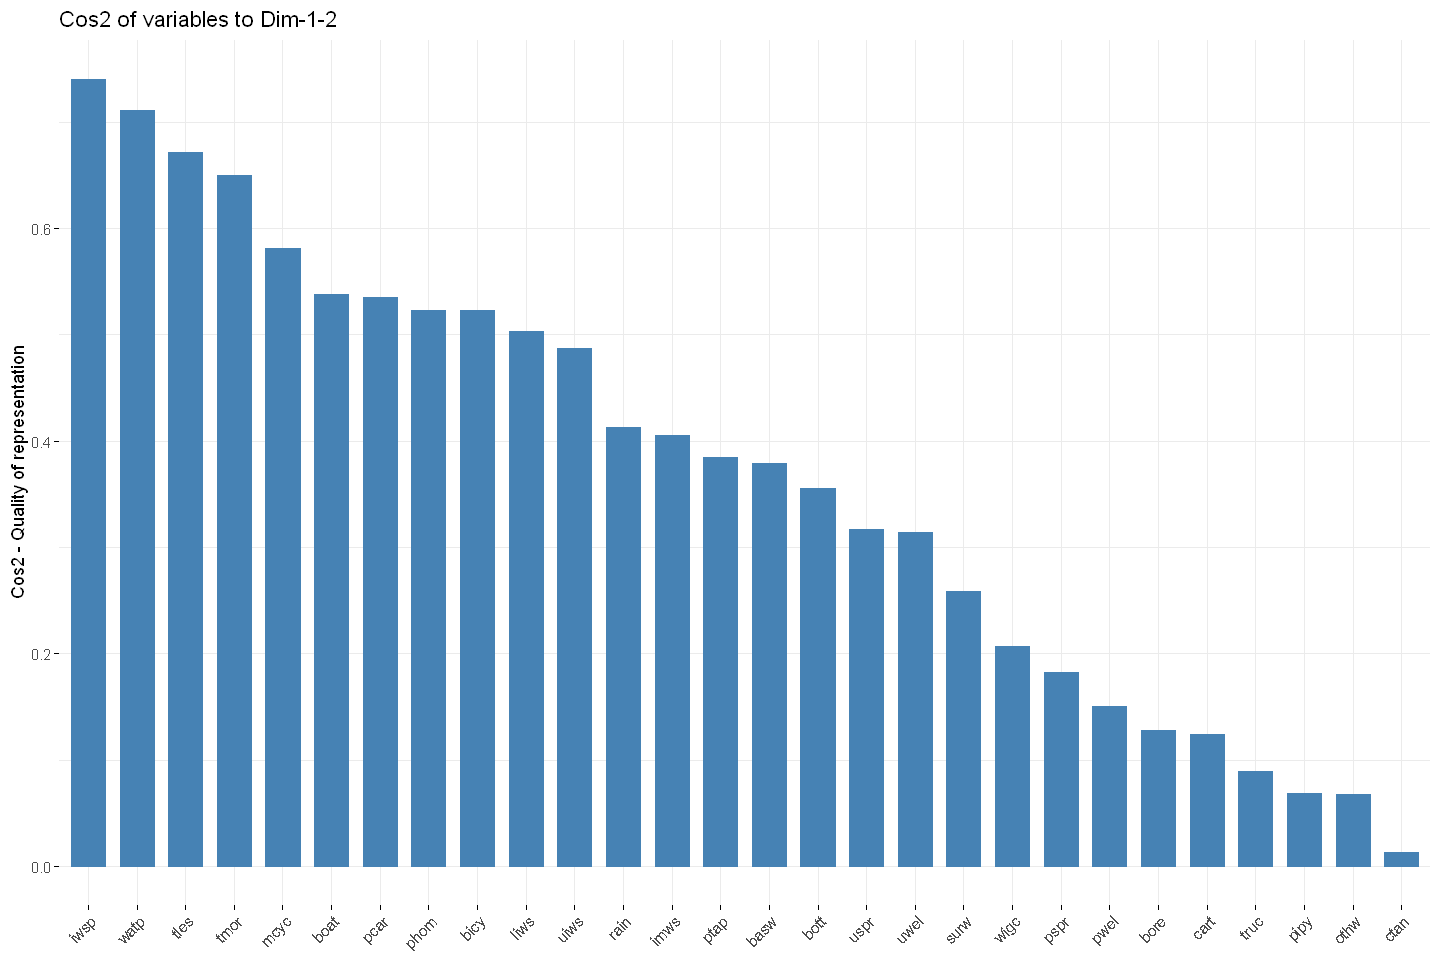

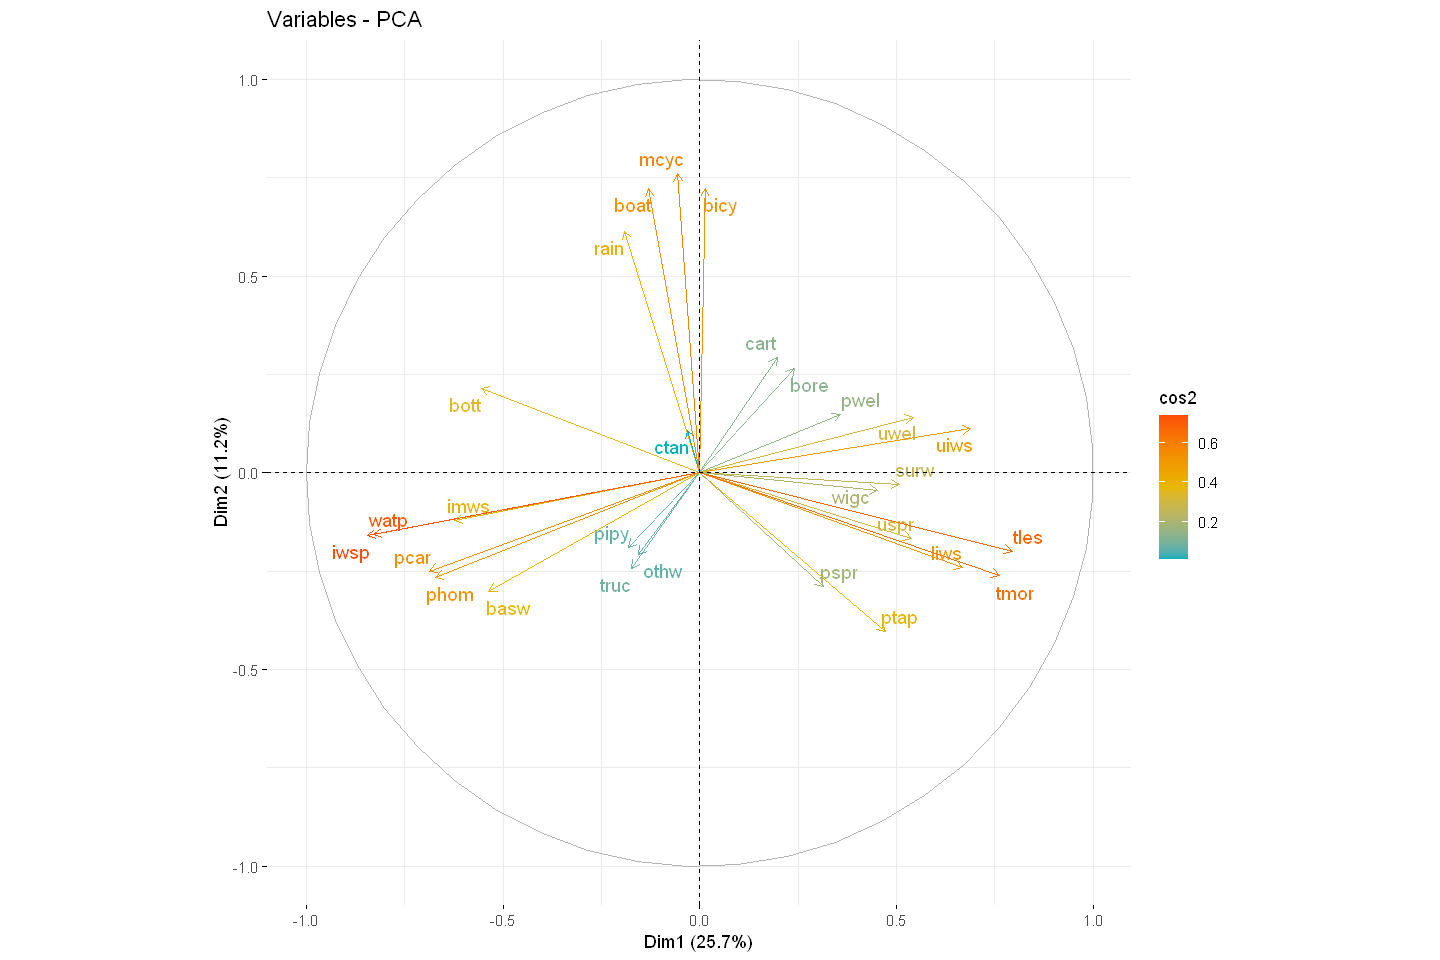

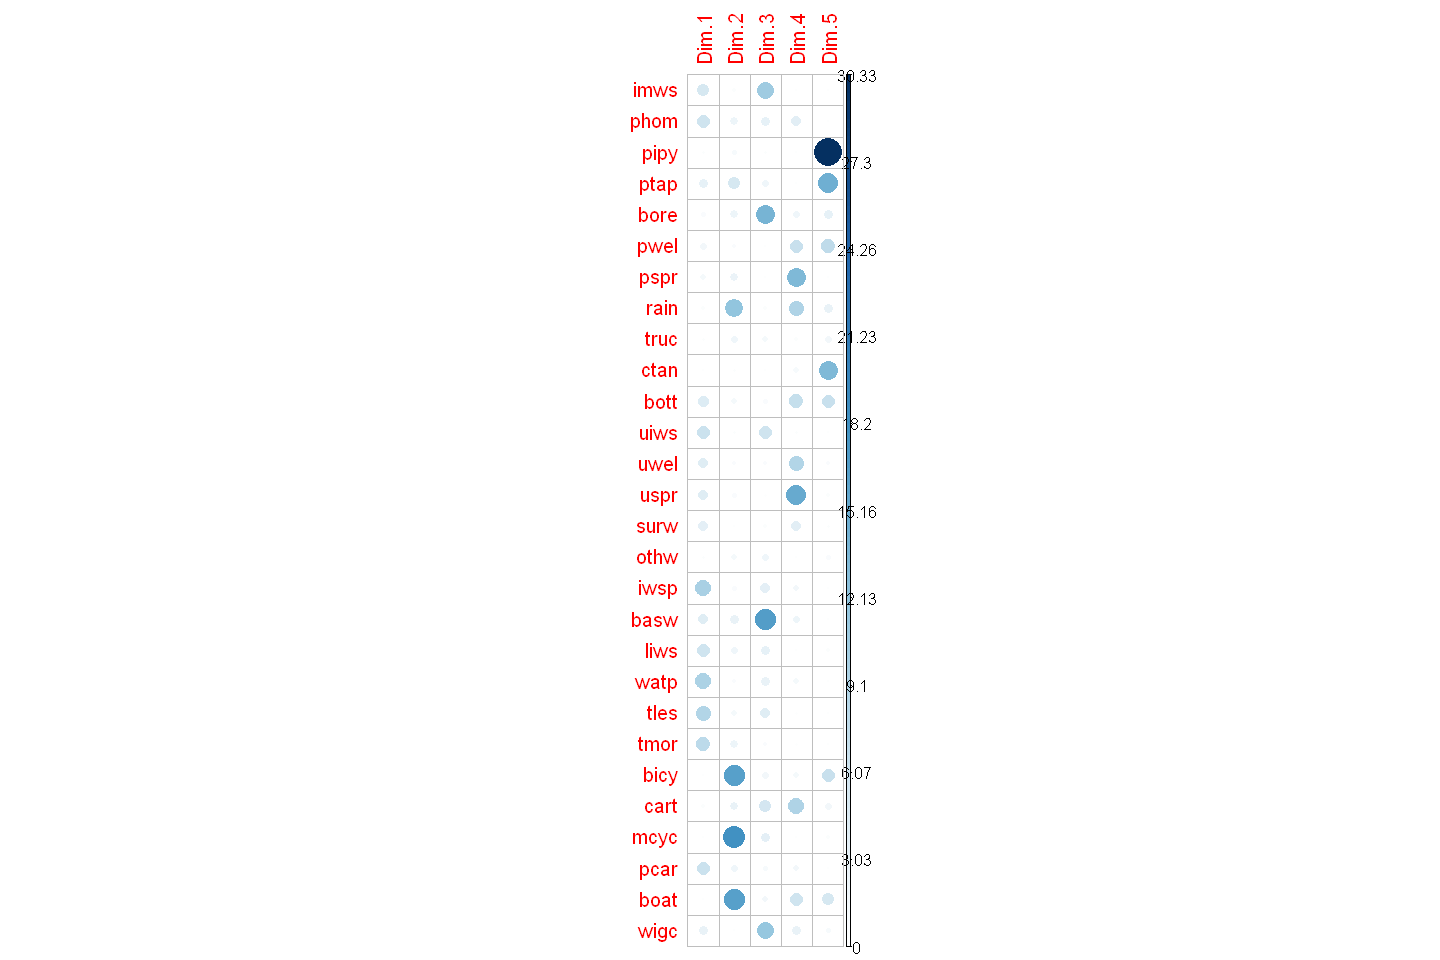

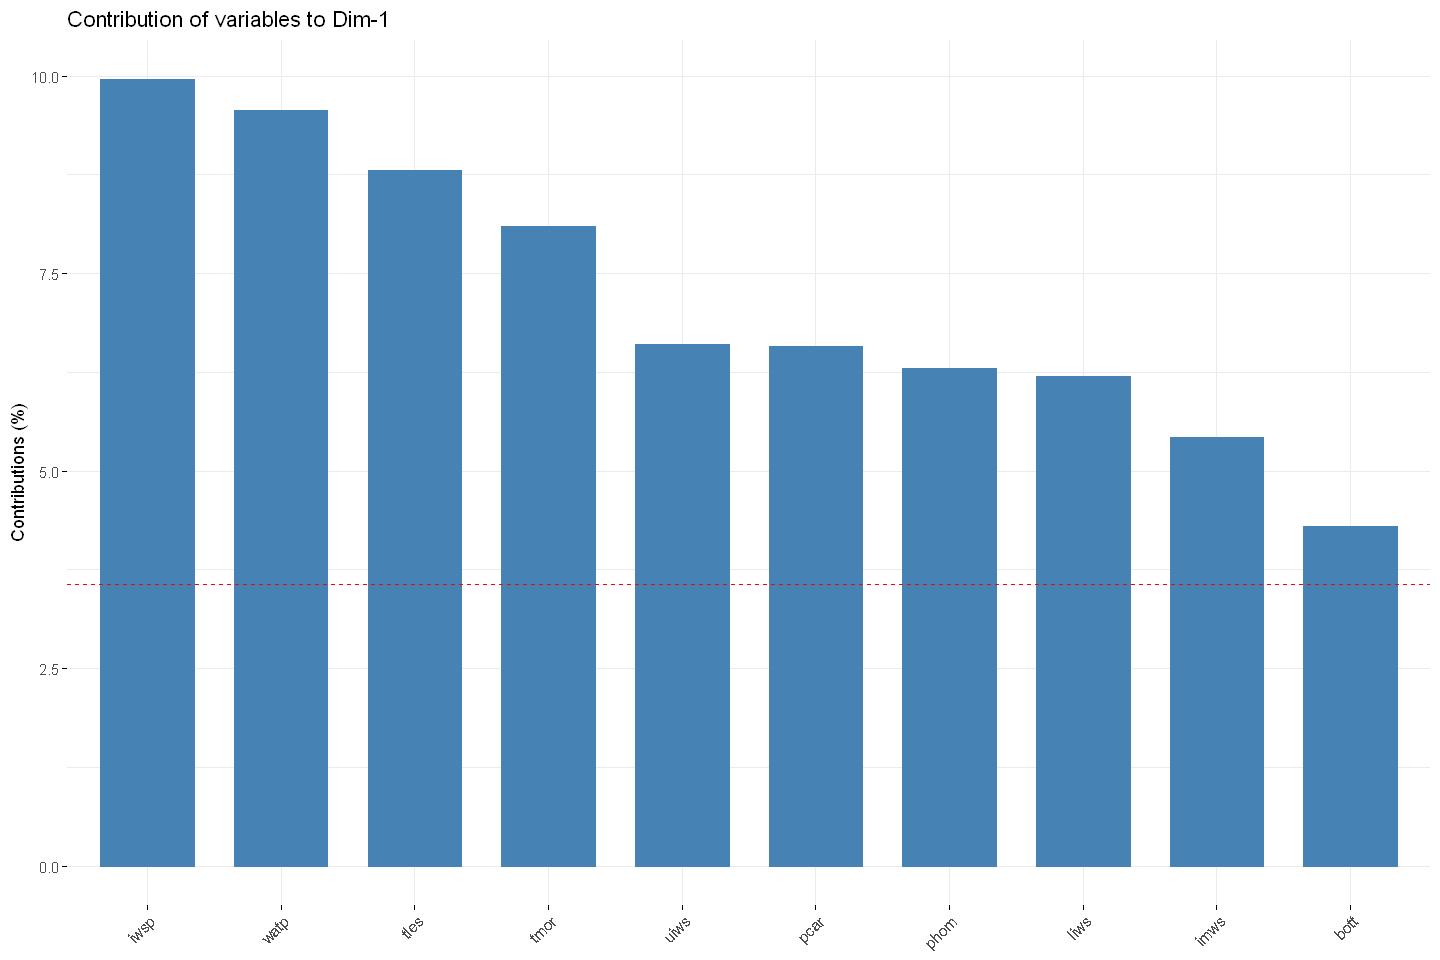

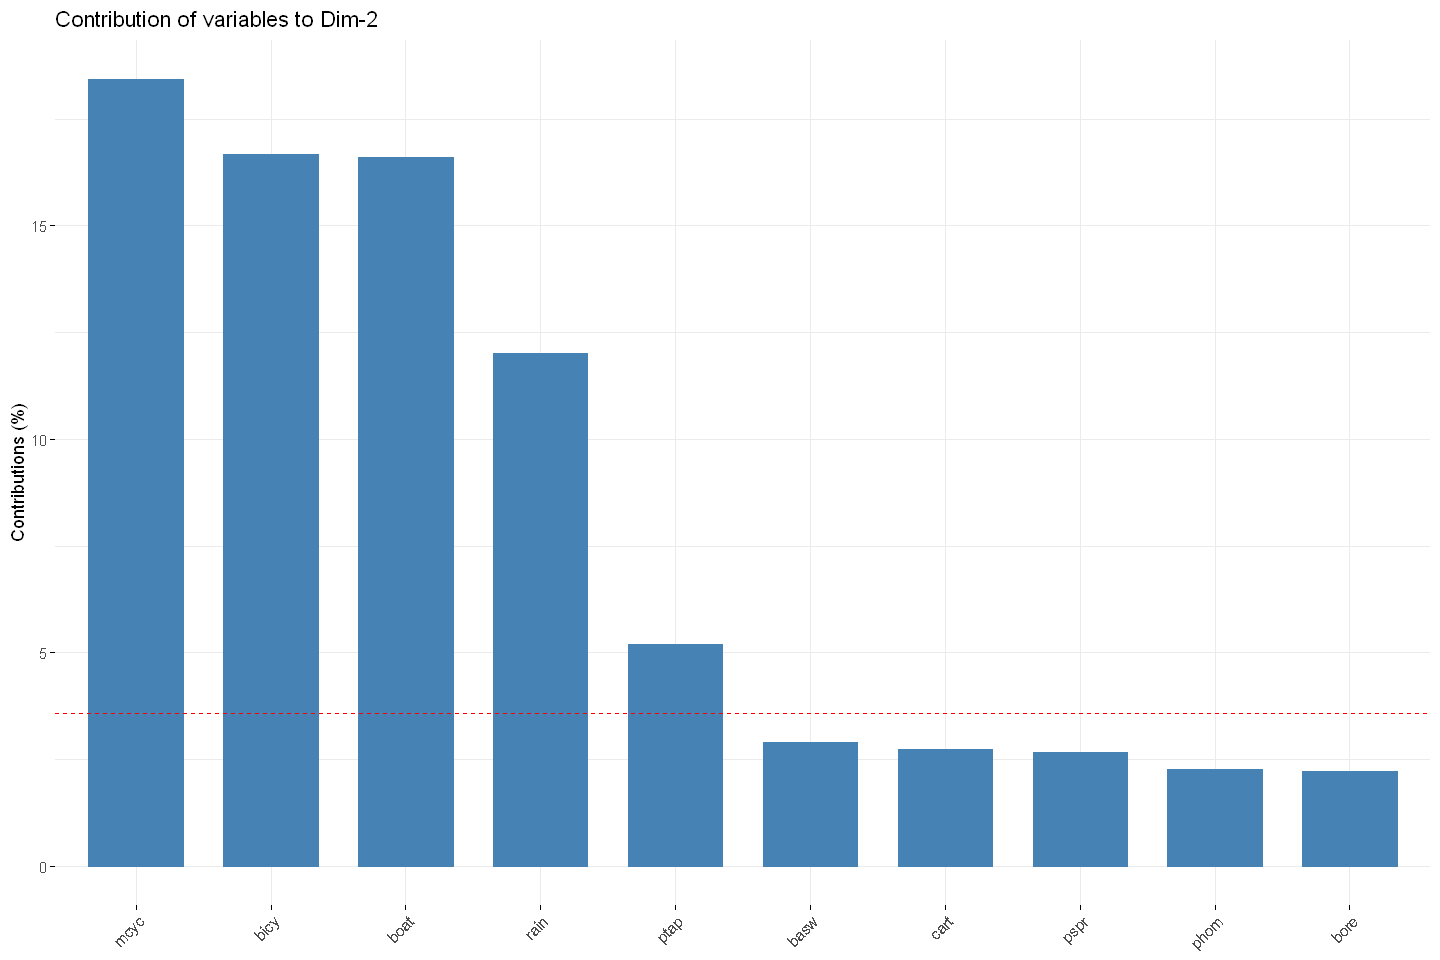

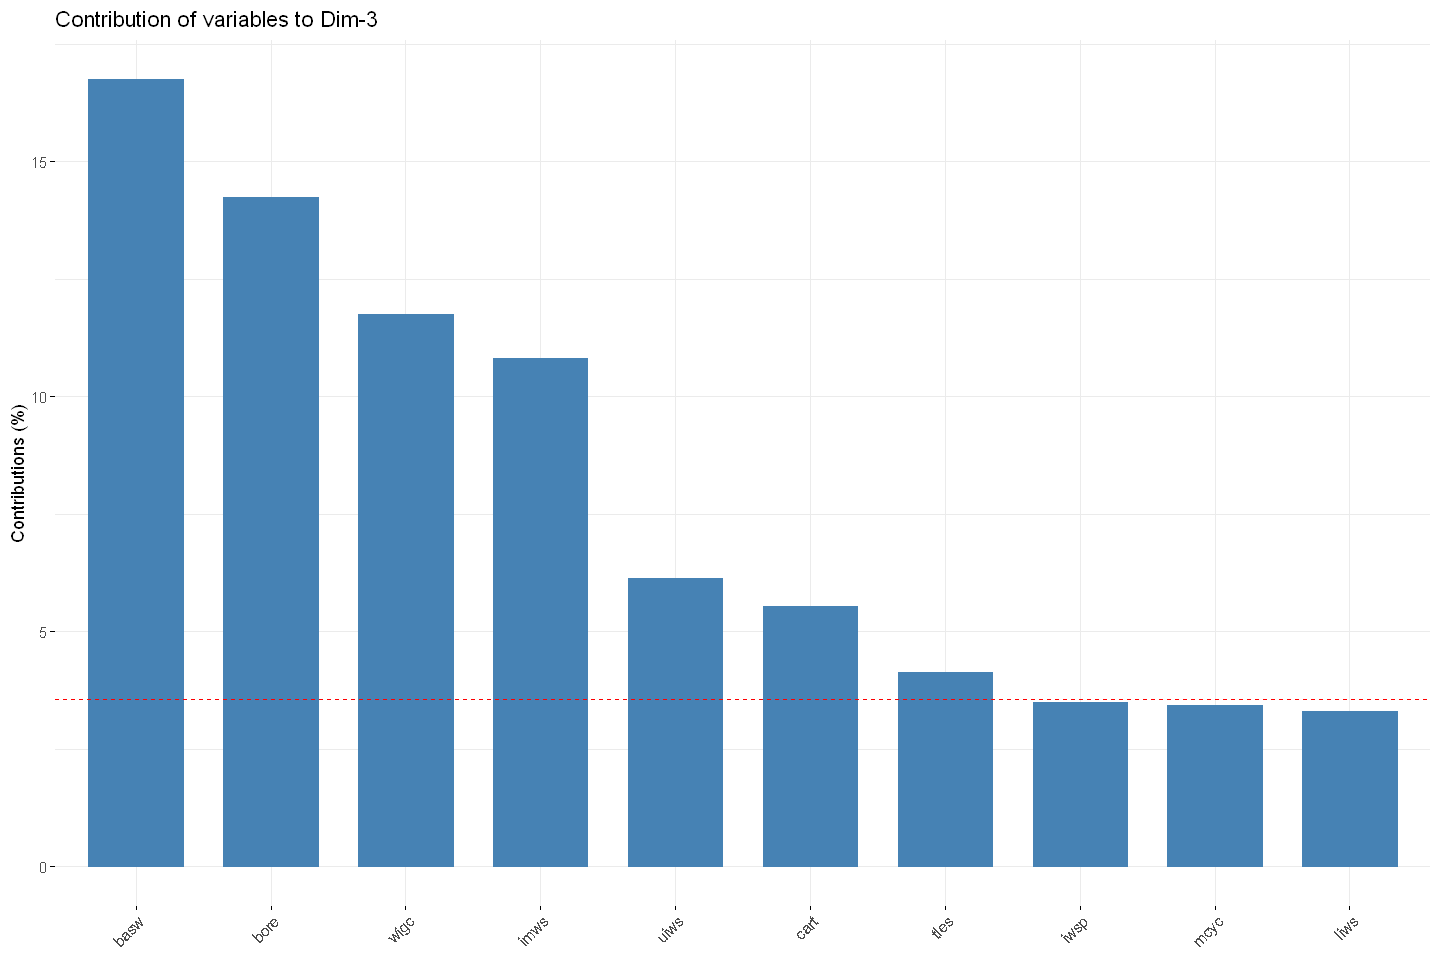

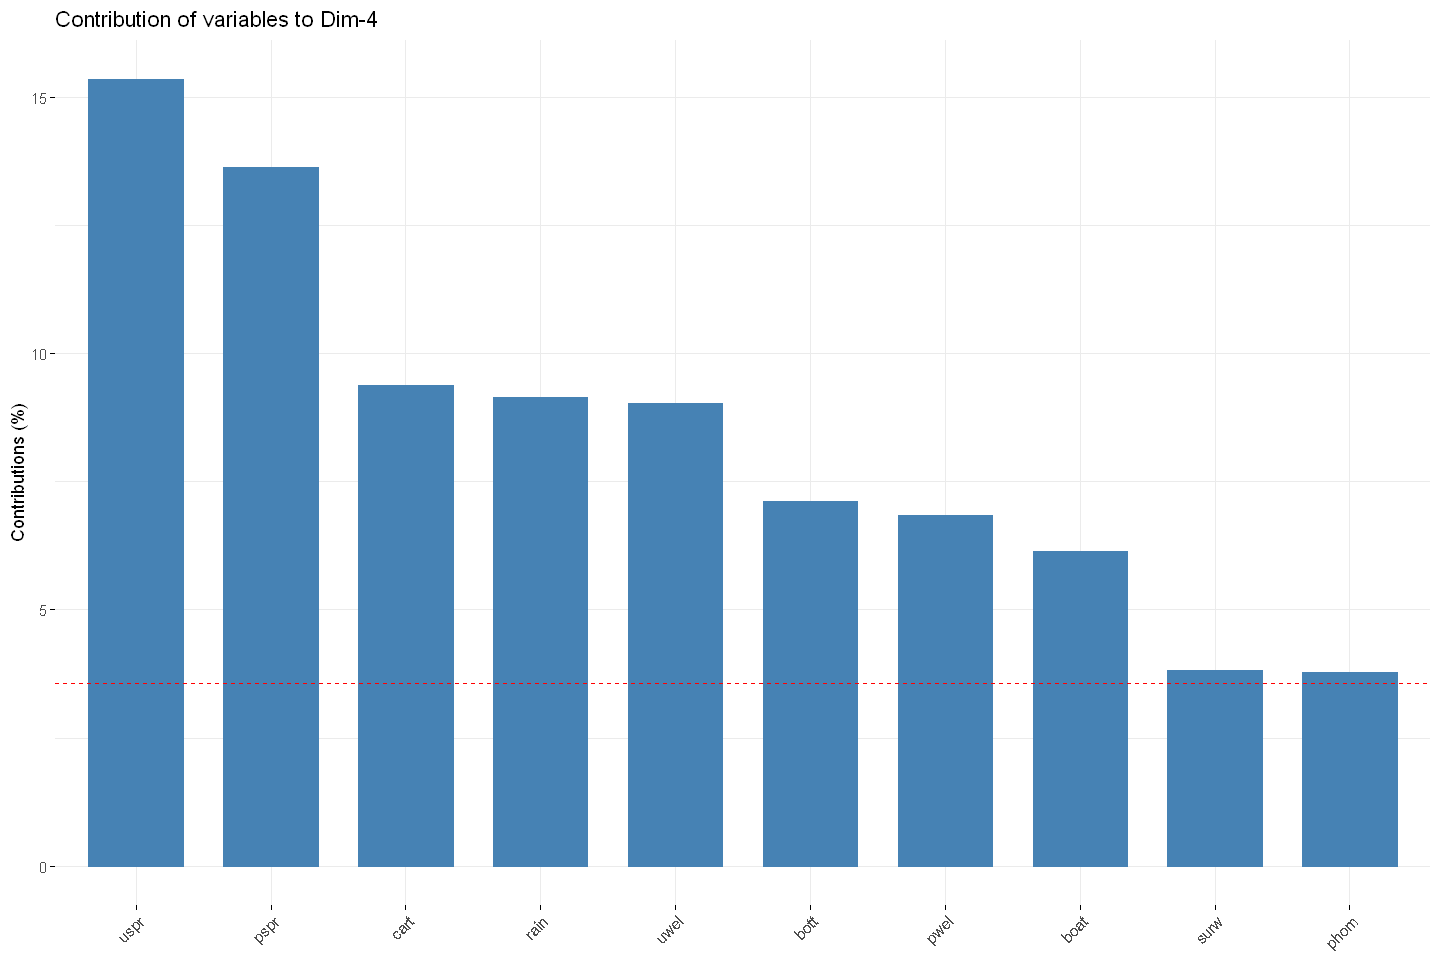

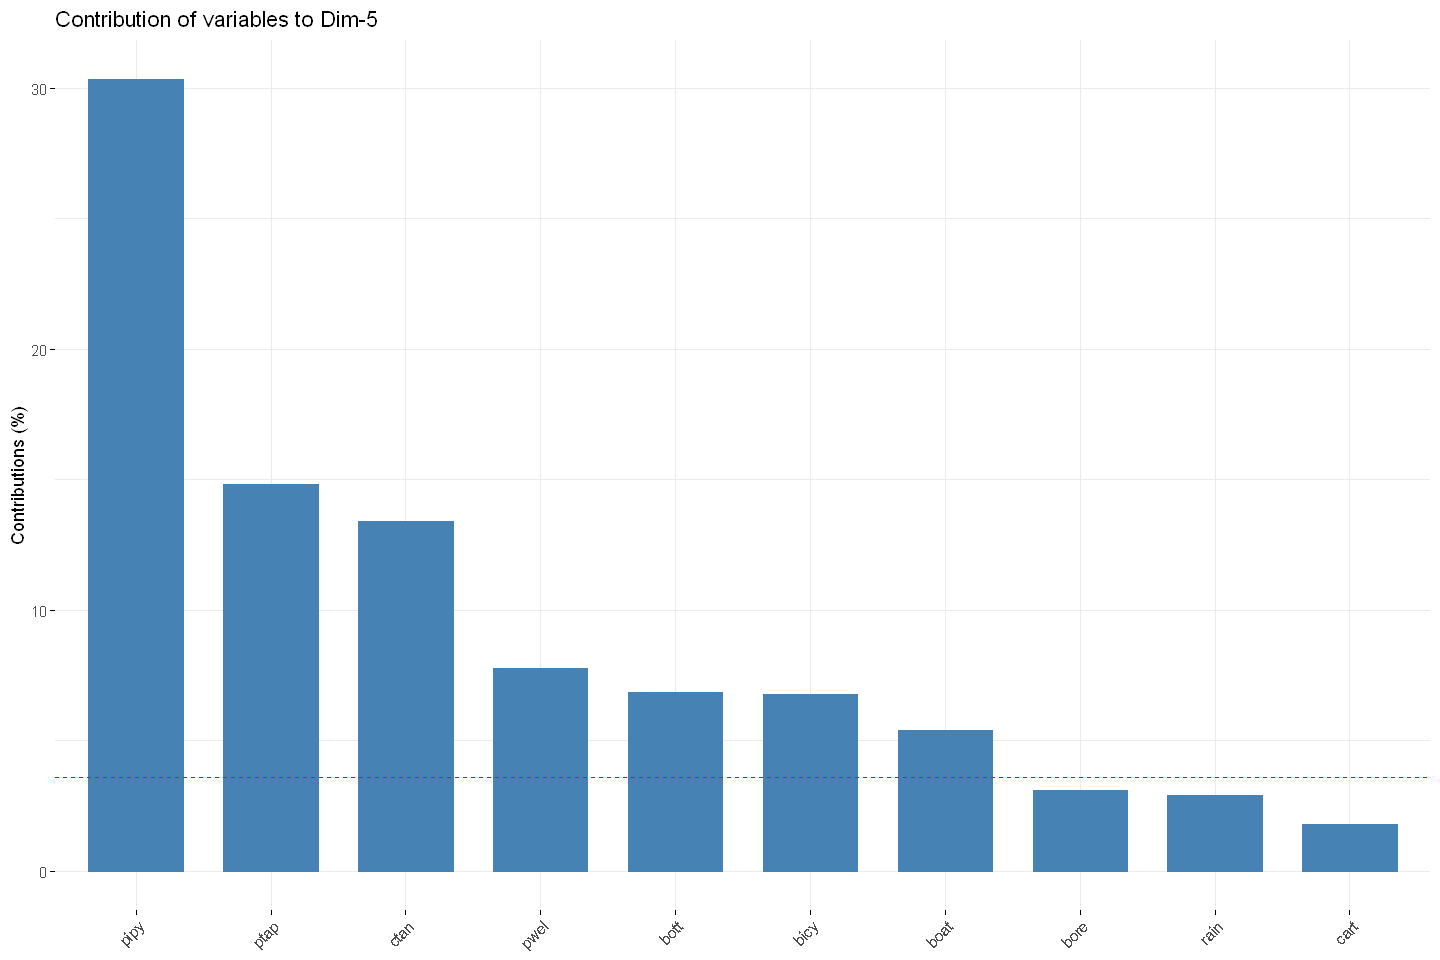

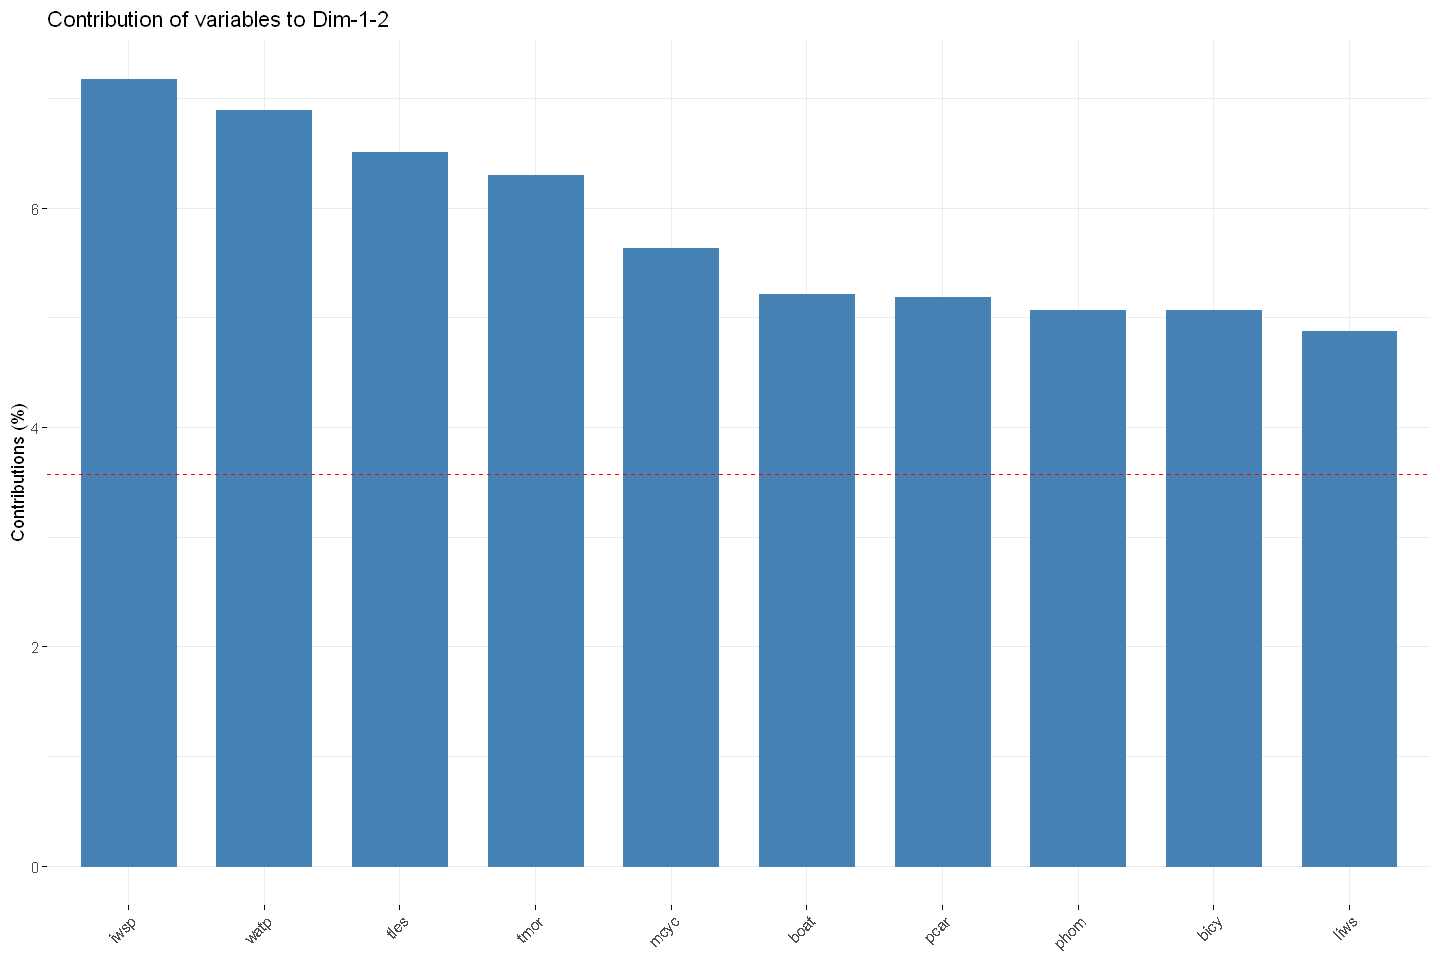

,correlation,p.value
tles,0.7950306,3.592930e-18
tmor,0.7625377,5.009347e-16
uiws,0.6887659,3.169678e-12
liws,0.6671447,2.569736e-11
uwel,0.5419988,2.976640e-07
uspr,0.5376866,3.849160e-07
surw,0.5076157,2.100725e-06
ptap,0.4712398,1.333332e-05
wigc,0.4523795,3.209110e-05
pwel,0.3574521,1.314404e-03


,correlation,p.value
mcyc,0.7603057,6.830960e-16
bicy,0.7231120,7.645849e-14
boat,0.7219084,8.793577e-14
rain,0.6136583,2.318207e-09
cart,0.2930447,9.221121e-03
bore,0.2640571,1.948789e-02
liws,-0.2406324,3.382213e-02
truc,-0.2429225,3.211248e-02
pcar,-0.2498889,2.735180e-02
tmor,-0.2617382,2.062391e-02


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
1,1.301860,0.6515263,0.06925877,-0.2112874,-1.8806527
2,-4.025045,-1.1343666,-0.32212377,-0.4998518,-1.0591103
3,1.763707,-0.8878332,-1.21875221,0.9345761,-2.0809174
4,-4.895421,-1.8705522,-0.46702876,-0.6518875,-0.2781660
5,-2.343265,-1.9549520,-0.74556197,-0.2208080,-0.2505446
6,-1.411576,0.3758040,3.00213377,-0.2283101,-1.0057310


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
1,0.07713281,0.019318542,0.0002183032,0.002031691,0.160963593
2,0.43245562,0.034348438,0.0027697823,0.006669337,0.029942118
3,0.08998525,0.022802445,0.0429684307,0.025266668,0.125264593
4,0.68472350,0.099971169,0.0062319269,0.012141727,0.002210768
5,0.28842183,0.200750962,0.0291979896,0.002561032,0.003297277
6,0.06187879,0.004385875,0.2798939222,0.001618765,0.031412108


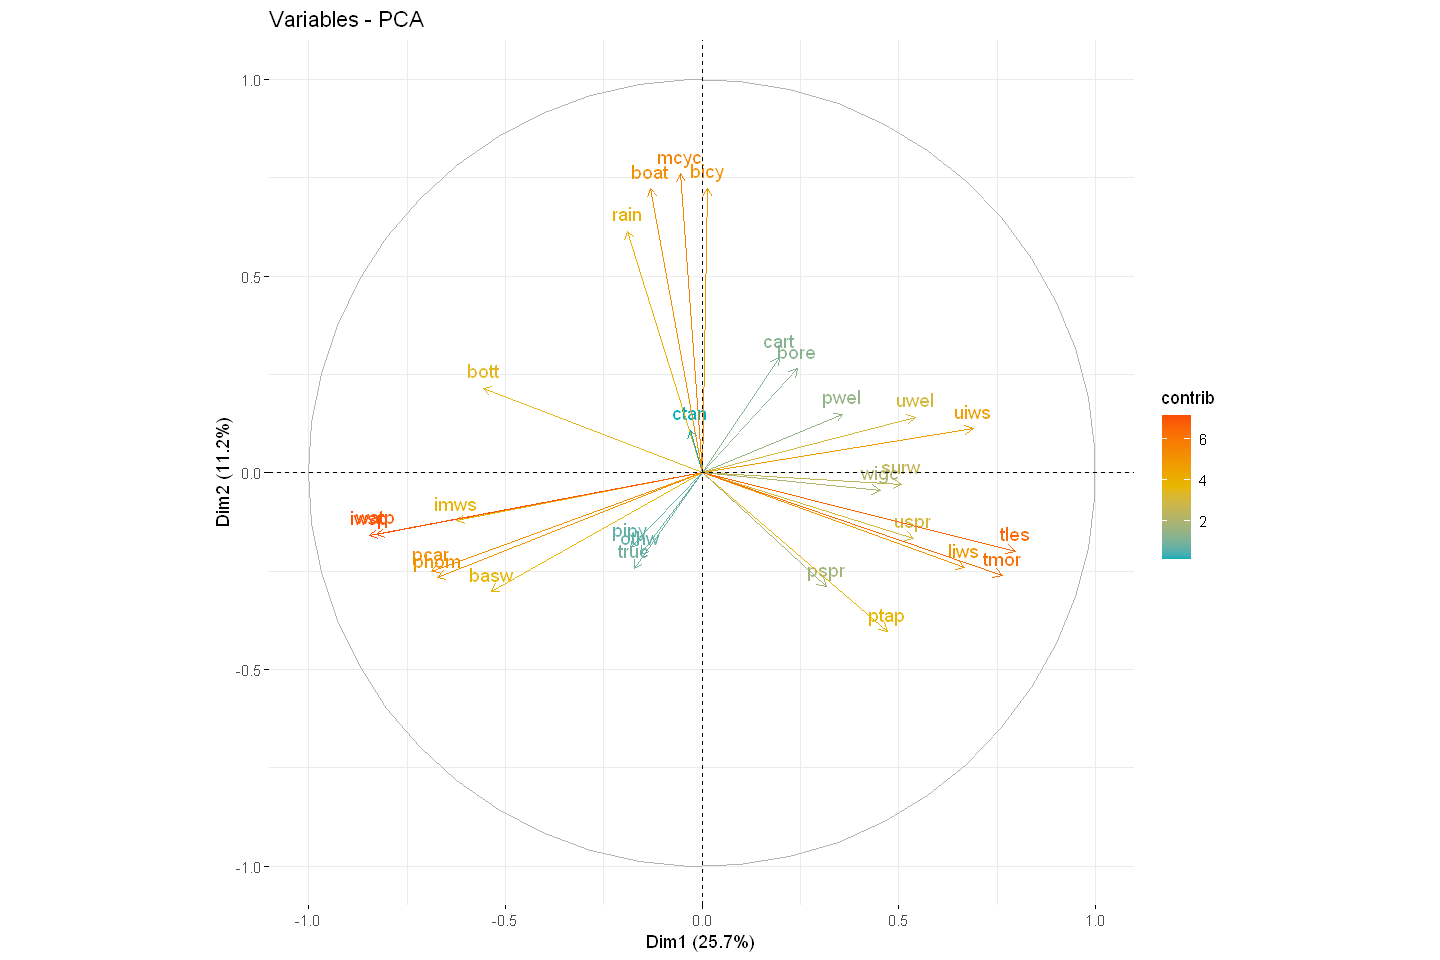

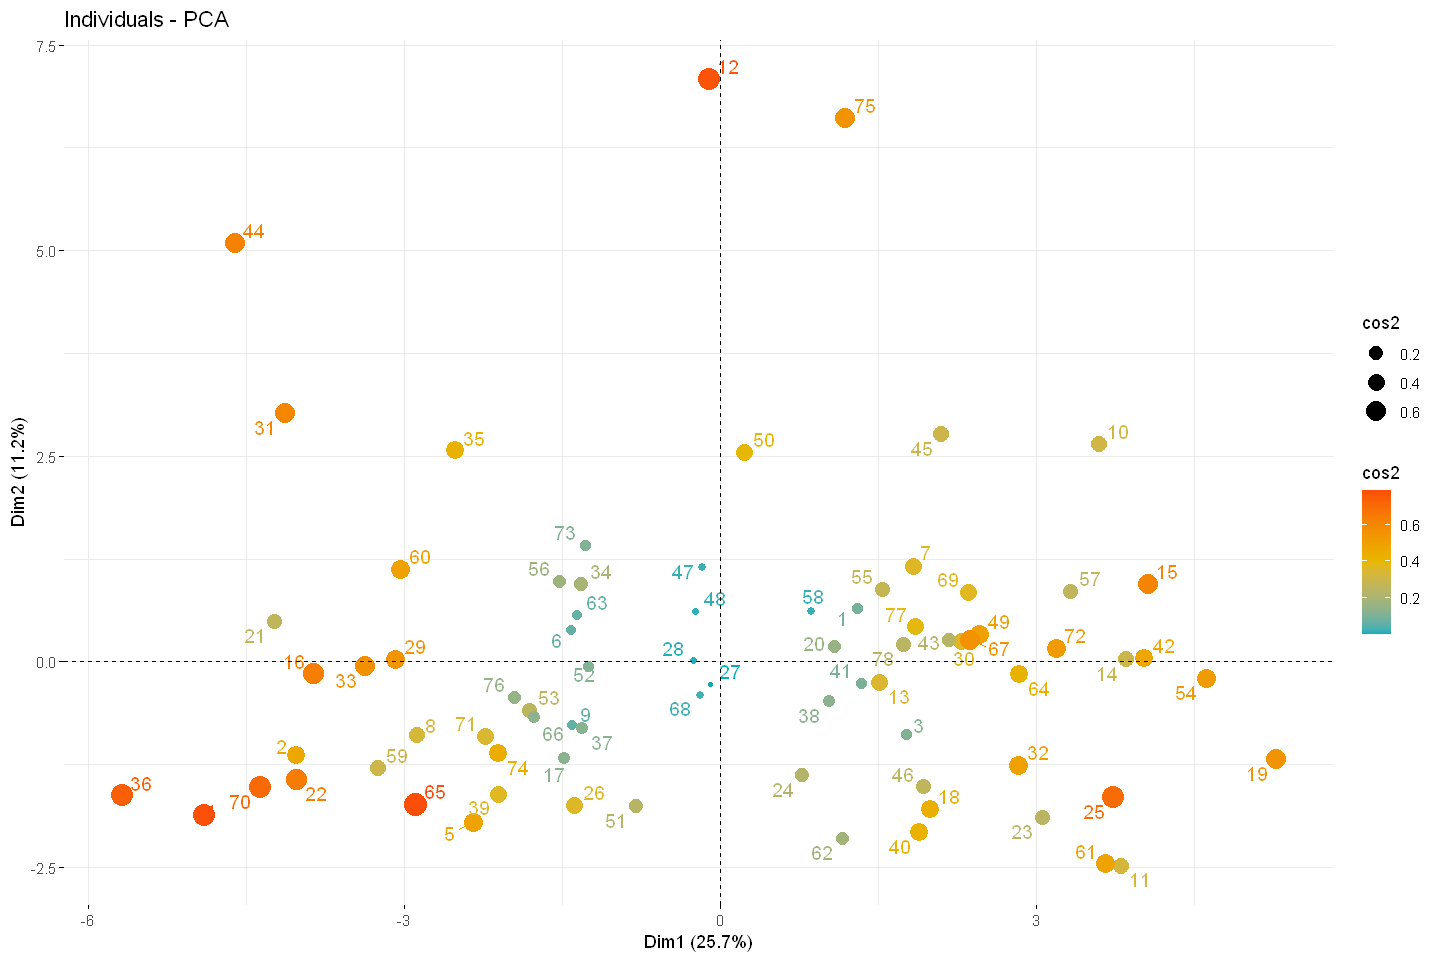

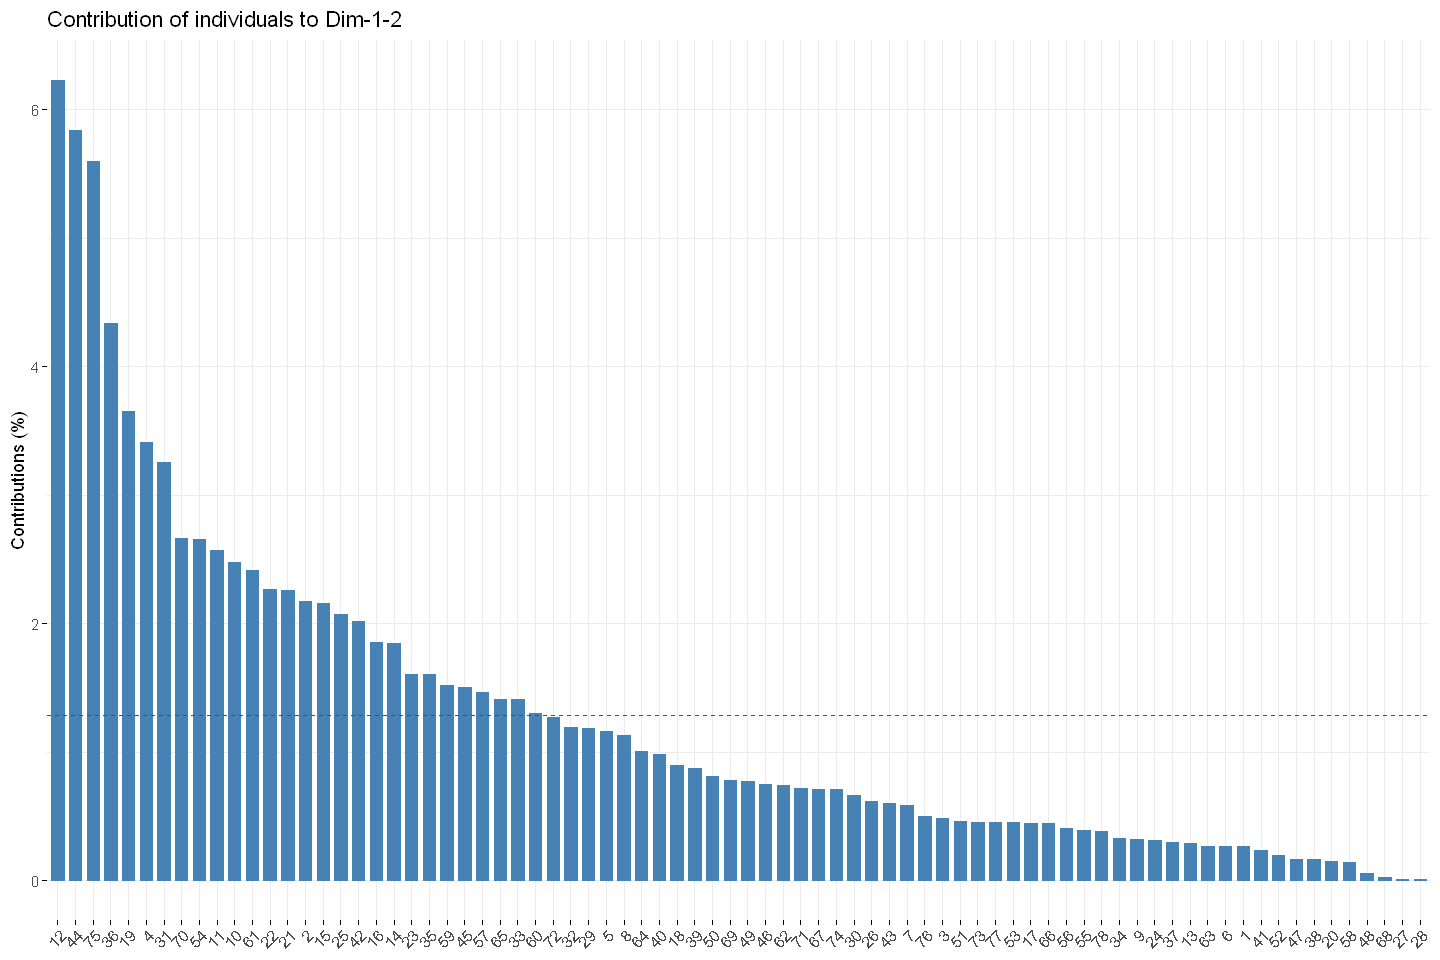

In [9]:
res.pca <- PCA(my_data, graph = FALSE)
print(res.pca)
eig.val <- get_eigenvalue(res.pca) #The object that is created using the function PCA() contains many information found in many different lists and matrices. These values are described in the next section.
eig.val
#An eigenvalue > 1 indicates that PCs account for more variance than accounted by one of the original variables in
#standardized data. This is commonly used as a cutoff point for which PCs are retained. This holds true only when
#the data are standardized.
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 76))
var <- get_pca_var(res.pca)
var
# Coordinates
head(var$coord, 36)
# Cos2: quality on the factor map
head(var$cos2,36)
# Contributions to the principal components
head(var$contrib, 36)
#For all the 36 variables.
fviz_pca_var(res.pca, col.var = "black")
#The plot above is also known as variable correlation plots. It shows the relationships between all variables. It can be interpreted as follow:
#Positively correlated variables are grouped together.
#Negatively correlated variables are positioned on opposite sides of the plot origin (opposed quadrants).
#The distance between variables and the origin measures the quality of the variables on the factor map. Variables that
#are away from the origin are well represented on the factor map.
corrplot(var$cos2, is.corr=FALSE, tl.cex = 1 )
# Total cos2 of variables on Dim.1 and Dim.2
fviz_cos2(res.pca, choice = "var", axes = 1:2, tl.cex = 1)
#A high cos2 indicates a good representation of the variable on the principal component. In this case the variable is
#positioned close to the circumference of the correlation circle.
#A low cos2 indicates that the variable is not perfectly represented by the PCs.
#In this case the variable is close to the center of the circle.
#The cos2 values are used to estimate the quality of the representation
#The closer a variable is to the circle of correlations,
#the better its representation on the factor map (and the more important it is to interpret these components)
#Variables that are closed to the center of the plot are less important for the first components.
# Color by cos2 values: quality on the factor map
fviz_pca_var(res.pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE # Avoid text overlapping, 
    )
#variables with low cos2 values will be colored in "white"
#variables with mid cos2 values will be colored in "blue"
#variables with high cos2 values will be colored in red
corrplot(var$contrib, is.corr=FALSE,tl.cex = 1) 
#The larger the value of the contribution, the more the variable contributes to the component.
# Contributions of variables to PC1
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)
# Contributions of variables to PC2
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)
# Contributions of variables to PC3
fviz_contrib(res.pca, choice = "var", axes = 3, top = 10)
# Contributions of variables to PC4
fviz_contrib(res.pca, choice = "var", axes = 4, top = 10)
# Contributions of variables to PC5
fviz_contrib(res.pca, choice = "var", axes = 5, top = 10)
fviz_contrib(res.pca, choice = "var", axes = 1:2, top = 10)
#It can be seen that the variables H IWS P and H W - contribute the most to the dimensions 1 and 2.
fviz_pca_var(res.pca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
)
res.desc <- dimdesc(res.pca, axes = c(1,2), proba = 0.05)
# Description of dimension 1
res.desc$Dim.1
res.desc$Dim.2
ind <- get_pca_ind(res.pca)
# Coordinates of individuals
head(ind$coord)
# Quality of individuals
head(ind$cos2)
# Contributions of individuals
fviz_pca_ind(res.pca, col.ind = "cos2", pointsize = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping (slow if many points)
)
# Total contribution on PC1 and PC2
fviz_contrib(res.pca, choice = "ind", axes = 1:2, tl.cex = .5)